# A Data driven Analysis on Social Anxiety based on daily habits.

Javier Godos de la Puente

***v 1.1, updated last 08/14/2025***

The following analysis is a basic overview on anxiety obtained from a Social Anxiety Dataset seen in [Kaggle](https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset/data)
and obtained through the Department Of Health in the Government of Western Australia.

**Whilst the origin of the data is grounded in reality** and obtained through legal sources according to the user who posted the dataset, **the data is synthetic in nature**. The original data has gone through standard procedures of anonymization to remove any traces of personal information. The new synthetic **data has been validated** across different academic papers on mental health, lifestyle influences and anxiety disorders **so it follows real data patterns of different experiences of social anxiety**. **Data has been cleaned beforehand to remove inconsistencies, missing values and unrealistic outliers.**

The type of anxiety represented here is concretely **Social Anxiety. This type of disorder is usually defined by a feeling of phobia, anxiety, insecurity and shamefulness in usual everyday social interactions.** At its worst, social anxiety can undermine a person's capabilities to form human relationships and sustain healthy daily social routines.

## 1. Information about the dataset

The dataset contains **11,000 samples** containing **19 features**.

These features consist in:

- **Basic Demographics**: Age, Gender and Occupation
- **Lifestyle features**: Sleep Hours (average per day), Physical Activity (h/week), Diet Quality (1-10 Scale), Alcohol Consumption (drinks/week), Caffeine Intake (average mg/day), Smoking (as a habit: Yes/No)
- **Health and Mental Health Indicators**: Heart Rate (average bpm), Breathing Rate (average breaths per minute), Stress Level (Scale 1-10), Sweating Level (Scale 1-5), Dizziness (Whether if the surveyed feels commonly feels dizzy: Yes/No)
- **Mental Health History**: Previous History of Anxiety in the Family (Yes/No), Use of Medication to supress anxiety (Yes/No), Therapy Frequency (common frequency of visits per month)
- **Life Events**: Recent Major Life Event (whether if the surveyed has lived an emotionally impactful life event recently: Yes/No)
- **Target Variable**: Social Anxiety Level (Scale 1-10)

## 2. Importation of libraries and dataset

In [2]:
## Importing all the libraries for the project and dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from numpy import dtype
from pandas.conftest import ordered
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDClassifier, Lasso, RidgeClassifier, Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, recall_score, r2_score, accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import ADASYN, SMOTE
import os
import xgboost as xgb

data = pd.read_csv("./Data/enhanced_anxiety_dataset.csv")
# print(os.listdir("//192.168.56.102/sambashare"))
# data = pd.read_csv("//192.168.56.102/sambashare/enhanced_anxiety_dataset.csv")
data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [3]:
## Check for datatype compatibility issues
data.info() ## Variables supposed to be strings are considered only "objects"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [4]:
data = data.astype({'Gender': "string", 'Occupation': "string", 'Smoking': "string", 'Family History of Anxiety': "string", 'Dizziness': "string", 'Medication': "string", 'Recent Major Life Event': "string"})
data.info() #All datatype issues are fixed and there are no null cells.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  string 
 2   Occupation                         11000 non-null  string 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  string 
 8   Family History of Anxiety          11000 non-null  string 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

## 3. (Exploratory) Data Analysis

### 3.1 Quantitative Analysis
The objective is to find the most significant insights in relation to the most relevant/target variable at hand: Anxiety Level. The objective is to find the most relevant features that might affect social anxiety in a Machine Learning problem.

Let's begin with a basic overview of the main statistics across all (numerical) variables.

In [5]:
data.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


Some basic insights can be derived from this information.

- _The dataset does not cover Social Anxiety for groups of age below 18 and above 64_ - research on this could be interesting since adolescents and elders could be **sensitive other factors that are not present in this case study** _**(bullying, usage of social media, average time spent outdoors per week etc.)**_
- Over 25% of the survey sleep nearly 6 hours. Whilst 7 hours of sleep are usually suggested as a good sleep (and the median of hours slept almost reaches said mark), **sleep quality is not an indicator**, this being likely an area of improvement in the study. Sleep quality depends on many factors, age being one of them according to [research backed by Harvard University.](https://www.health.harvard.edu/blog/how-much-sleep-do-you-actually-need-202310302986) The minimum average of sleep hours of 2.30 could be considered dangerously low.
- The interval considered normal for **Resting Heart Rates for adults** is between 60 and 100 bpm **when not considering exercise**. The usual rate for **"athletes in top condition is considerably lower**. Existing rates outside above the upper limits of these intervals can be perceived in the table and may be subject of interest. This information is based on a chart by USCF Benioff Children's Hospital as given to Forbes magazine and can be seen [here.](https://www.forbes.com/health/wellness/normal-heart-rate-by-age/)
- **Normal breathing rates lie in the 12-20 breathes per minute interval.** People with breathing rates above 20 breaths per minute are deemed to have *tachypnea*, which is usually denoted as a ***symptom***. Since the **21 is the median**, **higher breathing rates might** be useful indicators of higher social anxiety. More information about unusual breathing rates can be seen in [Medical News Today](https://www.medicalnewstoday.com/articles/324409#atypical-rates).

Let's have a first look on the distribution of the demographics and the target variable to check for possible biases.

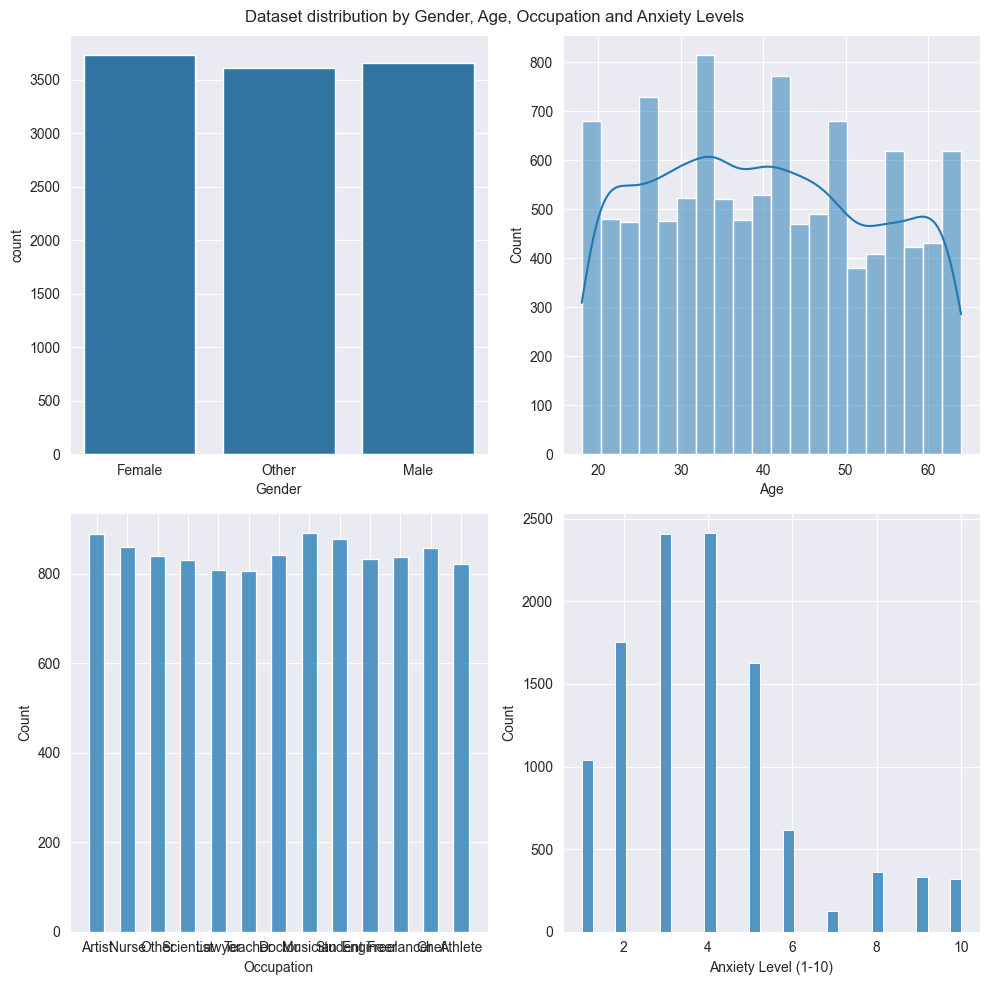

In [6]:
plt.figure(figsize=(10,10), tight_layout=True)
plt.suptitle("Dataset distribution by Gender, Age, Occupation and Anxiety Levels")
plt.subplot(2, 2, 1)
sns.countplot(data, x = 'Gender')

plt.subplot(2, 2, 2)
sns.histplot(data, x = 'Age', bins = 20, kde = True) #Kernel density function used to better understand age distribution under the histogram

plt.subplot(2, 2, 3)
sns.histplot(data, x = 'Occupation', bins = 10, shrink = 0.5)

plt.subplot(2, 2, 4)
sns.histplot(data, x = 'Anxiety Level (1-10)', shrink = 1)
plt.show() # Sample seems distributed evenly by age and gender.

As it be can seen, the distribution of the demographic variables is more or less even across variables. On the other hand, the target variable 'Anxiety Level (1 - 10)' is distributed in an uneven manner, where higher levels of anxiety are much less common. This means that the **target variable classes** are inbalanced.

In this sense, **it can be likely that if there are differences between levels above 7 and the rest (since symptoms could be much less common).** Let's chart some scatterplots to see whether this can be observed or not. Kernel Density Estimation will help to distinguish areas in the scatterplot that have more overlapped points than others. **To have an idea of which variables could show this better, let's pick the most correlated variables with regards of the target variable.**

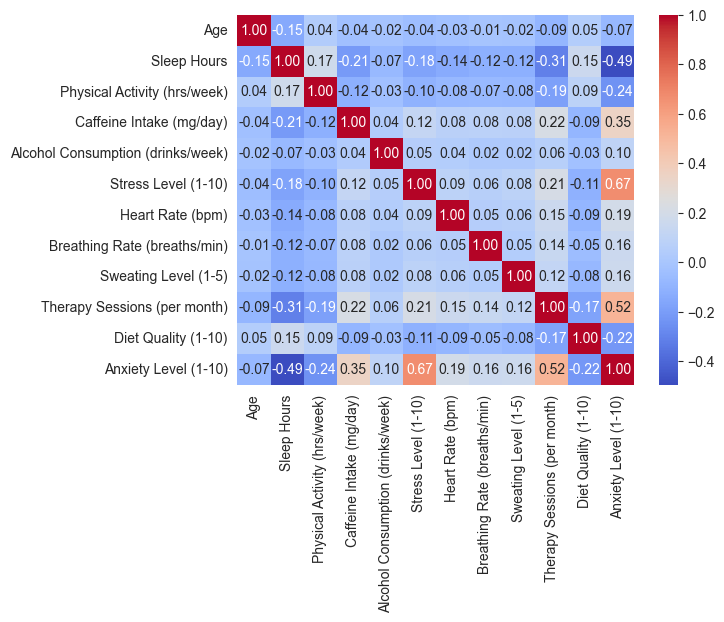

In [7]:
## Taking only numerical data
sample_corr = data.loc[:, ["Age", "Sleep Hours", "Physical Activity (hrs/week)", "Caffeine Intake (mg/day)",
                                  "Alcohol Consumption (drinks/week)", "Stress Level (1-10)", "Heart Rate (bpm)",
                                  "Breathing Rate (breaths/min)", "Sweating Level (1-5)", "Therapy Sessions (per month)",
                                  "Diet Quality (1-10)", "Anxiety Level (1-10)"]].corr()

sample_heatmap = sns.heatmap(sample_corr, annot=True, fmt=".2f", cmap="coolwarm")

##In absolute value, the highest correlations are Stress Level, Therapy Sessions (per month), Sleep Hours, and Caffeine Intake (mg/day)

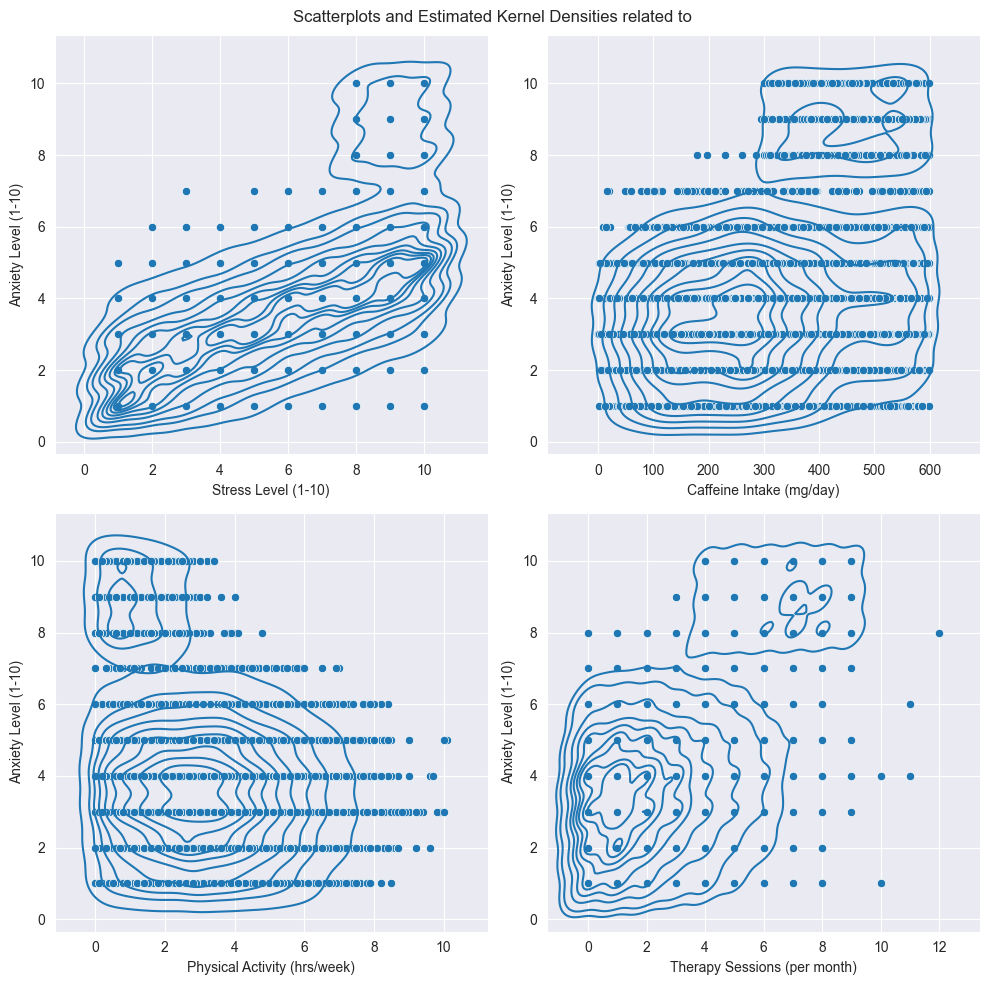

In [8]:
plt.figure(figsize = (10, 10), tight_layout=True)
plt.suptitle("Scatterplots and Estimated Kernel Densities related to ")
plt.subplot(2, 2, 1)
sns.scatterplot(data, x = 'Stress Level (1-10)', y = 'Anxiety Level (1-10)')
sns.kdeplot(data, x = 'Stress Level (1-10)', y = 'Anxiety Level (1-10)')

plt.subplot(2, 2, 2)
sns.scatterplot(data, x = 'Caffeine Intake (mg/day)', y = 'Anxiety Level (1-10)')
sns.kdeplot(data, x = 'Caffeine Intake (mg/day)', y = 'Anxiety Level (1-10)')

plt.subplot(2, 2, 3)
sns.scatterplot(data, x = 'Physical Activity (hrs/week)', y = 'Anxiety Level (1-10)')
sns.kdeplot(data, x = 'Physical Activity (hrs/week)', y = 'Anxiety Level (1-10)')

plt.subplot(2, 2, 4)
sns.scatterplot(data, x = 'Therapy Sessions (per month)', y = 'Anxiety Level (1-10)')
sns.kdeplot(data, x = 'Therapy Sessions (per month)', y = 'Anxiety Level (1-10)')
plt.show() 

Whilst the scatterplots do not reflect evenly the difference in point density, the estimated density plots tell well this information. In all four of these scatterplots, **two density areas** can be seen and one of them comes from *higher levels of anxiety*.

**Higher anxiety levels seem to be concentrated around people who do less than 3 hours of physical exercise (with higher densities near 0 exercise), go to therapy more than 3 times a month (with 7 or 8 on average), have really high stress levels (8 or higher) and consume more than 300 mg of caffeine per day (with 400 mg on average).**

This information might be better shown in a table to **show the mean levels whenever larger than seven or below than seven.**

In [9]:
data[">= 7"] = np.where(data["Anxiety Level (1-10)"] >= 7, True, False) #Add column to discuss whether the target variable is higher or lower than 7.
data.groupby([">= 7"])[['Caffeine Intake (mg/day)', 'Physical Activity (hrs/week)', 'Sleep Hours', 'Therapy Sessions (per month)']].describe().loc[:, (slice(None), ['mean'])]

,Caffeine Intake (mg/day),Physical Activity (hrs/week),Sleep Hours,Therapy Sessions (per month)
,mean,mean,mean,mean
>= 7,,,,
False,268.852580,3.125996,6.866065,1.999797
True,435.617414,1.347230,4.782410,6.140721


As it can be seen, **there are considerable differences in the consumption of caffeine and life quality (understood as more physical activity and more sleep).** There is also a significant increase in the times people assist to therapy per month.

Although it is also a good idea to see how much the populations deviate from their mean as to understand a bit more how these two different groups are numerically.

In [10]:
data.groupby([">= 7"])[['Caffeine Intake (mg/day)', 'Physical Activity (hrs/week)', 'Sleep Hours', 'Therapy Sessions (per month)']].describe().loc[:, (slice(None), ['std'])]

,Caffeine Intake (mg/day),Physical Activity (hrs/week),Sleep Hours,Therapy Sessions (per month)
,std,std,std,std
>= 7,,,,
False,138.771065,1.806126,1.059598,1.744766
True,104.433771,1.090409,0.972486,2.080570


Just as expected and as seen in the scatterplot, the standard deviation for these groups is lower when it comes to intakes of caffeine, physical activity and sleep hours. Standard deviation for number of therapy sessions a month is higher for people suffering of high social anxiety, but its mean is also much higher.

In this sense, the number of therapy sessions per month **will be probably a very relevant indicator of whether someone surveyed is in the upper levels of anxiety scale.**

### 3.2 Qualitative Analysis

Let's begin the overview of the qualitative variables by checking the possible values that these can have.

In [11]:
qual_names = ["Occupation", "Smoking", "Family History of Anxiety", "Dizziness", "Medication", "Recent Major Life Event"]

for col in qual_names:
    print("Possible data values in the",col, "column:", data[col].unique())

Possible data values in the Occupation column: <StringArray>
[    'Artist',      'Nurse',      'Other',  'Scientist',     'Lawyer',
    'Teacher',     'Doctor',   'Musician',    'Student',   'Engineer',
 'Freelancer',       'Chef',    'Athlete']
Length: 13, dtype: string
Possible data values in the Smoking column: <StringArray>
['Yes', 'No']
Length: 2, dtype: string
Possible data values in the Family History of Anxiety column: <StringArray>
['No', 'Yes']
Length: 2, dtype: string
Possible data values in the Dizziness column: <StringArray>
['No', 'Yes']
Length: 2, dtype: string
Possible data values in the Medication column: <StringArray>
['Yes', 'No']
Length: 2, dtype: string
Possible data values in the Recent Major Life Event column: <StringArray>
['Yes', 'No']
Length: 2, dtype: string


Except for the Occupation variable, the rest of the variables are binary in nature.

Let's start by checking out the Occupation variable, since it has the most possible values. Let's use stacked bars to check the proportion of people to each category in the anxiety scale.

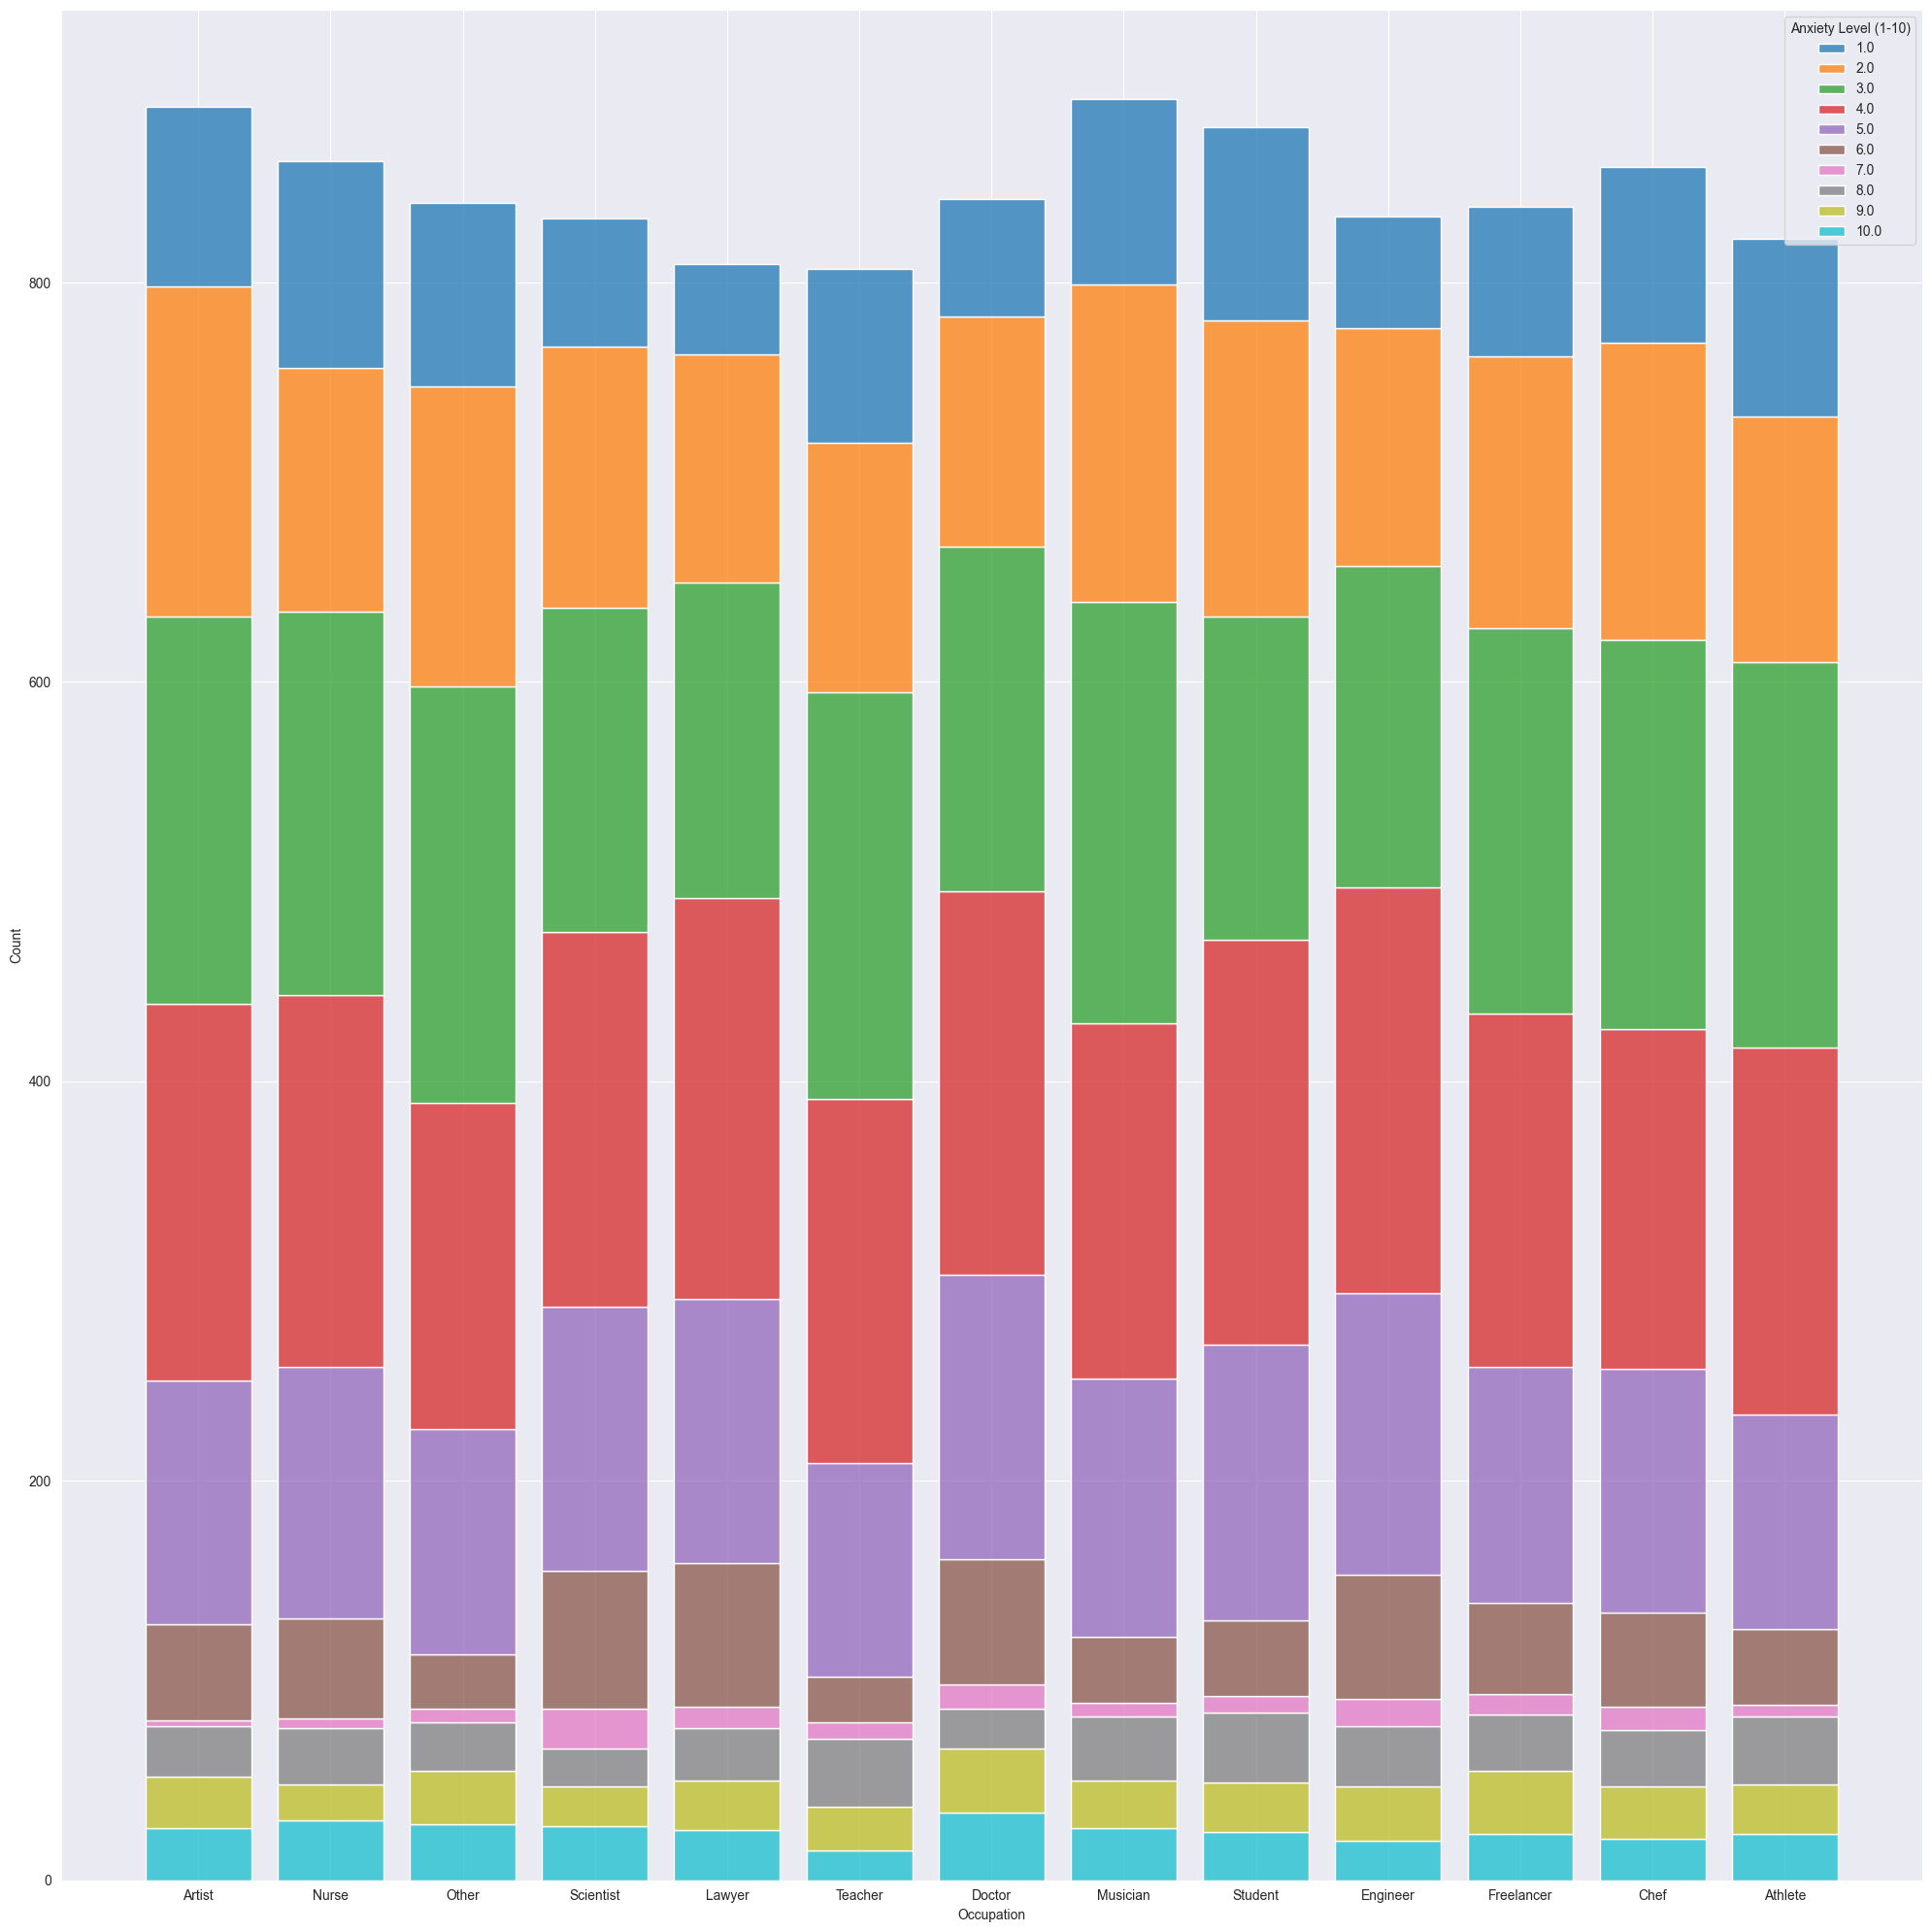

In [12]:
plt.figure(figsize=(20, 20), tight_layout=True)
# sns.set_style("whitegrid")
sns.histplot(data = data, x = 'Occupation', hue = 'Anxiety Level (1-10)', shrink = 0.8, palette = "tab10", multiple = "stack")
plt.show()

Starting from higher levels, data seems to be evenly distributed across categories, being slightly higher for doctors and slightly lower for teachers. Cumulatively, **if the criteria of high anxiety being levels higher than 7 still stands,** the position with higher social anxiety is Doctor, with Lawyers and Scientists in second and third place; whilst the Ocupation with the lowest count of people is Teacher.

Let's view the proportions of Anxiety Levels in the rest of qualitative binary variables to check for any differences.

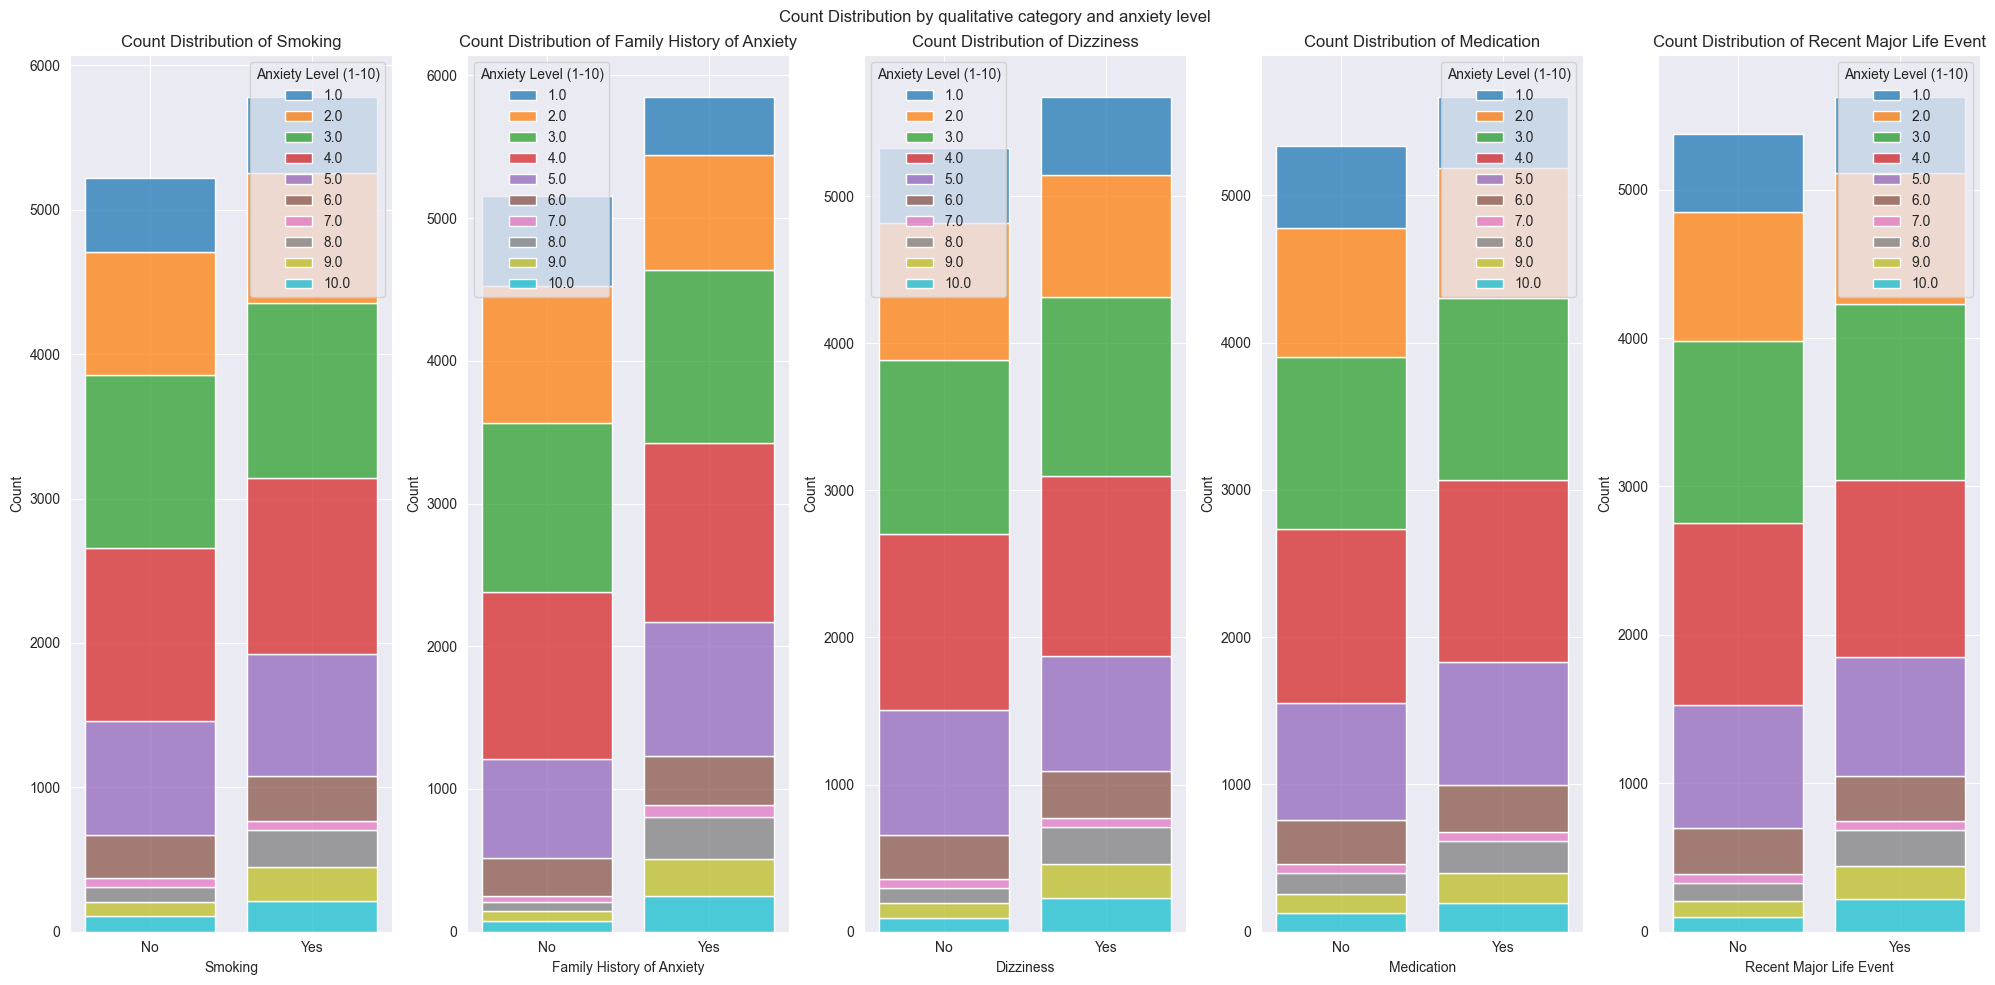

In [13]:
# As to show in the right and left of the histograms "No" and "Yes" respectively, the Categorical method of Pandas is used to solve the issue sequentially in these variables.
fig = plt.figure(figsize=(20, 10), tight_layout=True)
for i, col in enumerate(qual_names[1:]):
    ax = plt.subplot(1, 5, i+1)
    info = pd.Categorical(data[col], ['No', 'Yes'])
    sns.histplot(data, x=info, hue='Anxiety Level (1-10)', multiple = "stack", palette = "tab10", shrink = 0.8)
    plt.title("Count Distribution of " + col)
    ax.set_xlabel(col)

fig.suptitle("Count Distribution by qualitative category and anxiety level")
plt.show()

These graph bars show some significant differences given the response of the categories. In general, high anxiety (represented by dark purple and the colors below it) are higher in proportion for people who consume tobacco, have a Family History of Anxiety, feel dizziness, take medication and have passed through a major life event recently.

In order to check whether if any of these could be a useful indicator of high anxiety, **Bayes' Theorem can be used to calculate the probabilities of having high anxiety if it belongs to any of these categories via conditional population numbers.**

As a reminder, in this analysis **a surveyed is considered to have high anxiety if it has responder to have a Anxiety Level of 7 or above.**

In [14]:
anx_freq = data.groupby([">= 7"]).size().reset_index(name = "RelativeFreq")/data.shape[0] #Get population probability of having anxiety
anx_freq

,>= 7,RelativeFreq
0,0.000000,0.896636
1,0.000091,0.103364


In [15]:
p_A0 = anx_freq.loc[0, 'RelativeFreq'] #0.8966
p_A1 = anx_freq.loc[1, 'RelativeFreq'] #0.1034

post_prob_A1_v1 = {}
post_prob_A1_v0 = {}
post_prob_A0_v0 = {}
post_prob_A0_v1 = {}

for col in qual_names[1:]:

    temp_freq_table = data.groupby([col, ">= 7"]).size().reset_index(name = "Count")
    total_per_cat = temp_freq_table.groupby([">= 7"])['Count'].transform("sum")
    
    temp_freq_table['RelativeFreq'] = temp_freq_table['Count'] / total_per_cat  #Find p_v1_A0, p_v1_A1, p_v0_A0, p_v1_A0 in a single table.
    # print(temp_freq_table)
    #Extract the probabilities
    p_v0_A0 = temp_freq_table[(temp_freq_table[col] == "No") & (temp_freq_table[">= 7"] == False)]['RelativeFreq'].iloc[0]
    p_v1_A0 = temp_freq_table[(temp_freq_table[col] == "Yes") & (temp_freq_table[">= 7"] == False)]['RelativeFreq'].iloc[0]
    p_v0_A1 = temp_freq_table[(temp_freq_table[col] == "No") & (temp_freq_table[">= 7"] == True)]['RelativeFreq'].iloc[0]
    p_v1_A1 = temp_freq_table[(temp_freq_table[col] == "Yes") & (temp_freq_table[">= 7"] == True)]['RelativeFreq'].iloc[0]

    p_v1 = p_v1_A1*p_A1 + p_v1_A0*p_A0 #Calculate the total probability of belonging to the "Yes" group in the target variable
    p_v0 = p_v0_A1*p_A1 + p_v0_A0*p_A0

    p_A1_v1 = (p_v1_A1*p_A1)/p_v1
    p_A1_v0 = (p_v0_A1*p_A1)/p_v0
    p_A0_v0 = (p_v0_A0*p_A0)/p_v0
    p_A0_v1 = (p_v1_A0*p_A0)/p_v1

    post_prob_A1_v1[col] = p_A1_v1
    post_prob_A1_v0[col] = p_A1_v0
    post_prob_A0_v0[col] = p_A0_v0
    post_prob_A0_v1[col] = p_A0_v1
    

post_prob_df = pd.DataFrame([post_prob_A1_v1, post_prob_A1_v0, post_prob_A0_v1, post_prob_A0_v0])
post_prob_df.index = pd.Index(["A1_v1", "A1_v0", "A0_v1", "A0_v0"])

post_prob_df.head()

,Smoking,Family History of Anxiety,Dizziness,Medication,Recent Major Life Event
A1_v1,0.132895,0.151360,0.136812,0.118955,0.132669
A1_v0,0.070676,0.048904,0.067755,0.086802,0.072717
A0_v1,0.867105,0.848640,0.863188,0.881045,0.867331
A0_v0,0.929324,0.951096,0.932245,0.913198,0.927283


As we can see, **the calculated posterior probabilities show that these variables by themselves are not very relevant** to show that someone surveyed has high anxiety or not, **although the proportions per category inside each variable makes it seem relevant.**

The principal reason for this is **the relative proportion of people having high anxiety within the entire population**. As seen above, **both in the calculations of the proportions and the histogram**, the population that has levels higher than 7 are very low. **Although it is 3 times more likely to have high anxiety with previous family history than not**, the reality is that proportionately, **if it is looked in the higher scheme of things with the rest of the population, only 15.1% of people that has had a Family History of Anxiety also has High Anxiety.**

These same principles apply for all other qualitative variables in this case study as seen in the table above.

### 3.2.1 Example of population influence

***This example goes out of the way of the analysis a little bit to explain and discuss the influence of global population in posterior probability analysis.***

**The influence of population disparity** can easily be seen in the next example, where **we assume that the population of high anxiety and low anxiety is proportionately equal.**

In [16]:
#Observe how much the posterior probabilities change at the table at the end of the cell.

p_A0 = 0.5
p_A1 = 0.5

post_prob_A1_v1 = {}
post_prob_A1_v0 = {}
post_prob_A0_v0 = {}
post_prob_A0_v1 = {}

for col in qual_names[1:]:

    temp_freq_table = data.groupby([col, ">= 7"]).size().reset_index(name = "Count")
    total_per_cat = temp_freq_table.groupby([">= 7"])['Count'].transform("sum")

    temp_freq_table['RelativeFreq'] = temp_freq_table['Count'] / total_per_cat  #Find p_v1_A0, p_v1_A1, p_v0_A0, p_v1_A0 in a single table.
    # print(temp_freq_table)
    #Extract the probabilities
    p_v0_A0 = temp_freq_table[(temp_freq_table[col] == "No") & (temp_freq_table[">= 7"] == False)]['RelativeFreq'].iloc[0]
    p_v1_A0 = temp_freq_table[(temp_freq_table[col] == "Yes") & (temp_freq_table[">= 7"] == False)]['RelativeFreq'].iloc[0]
    p_v0_A1 = temp_freq_table[(temp_freq_table[col] == "No") & (temp_freq_table[">= 7"] == True)]['RelativeFreq'].iloc[0]
    p_v1_A1 = temp_freq_table[(temp_freq_table[col] == "Yes") & (temp_freq_table[">= 7"] == True)]['RelativeFreq'].iloc[0]

    p_v1 = p_v1_A1*p_A1 + p_v1_A0*p_A0 #Calculate the total probability of belonging to the "Yes" group in the target variable
    p_v0 = p_v0_A1*p_A1 + p_v0_A0*p_A0

    p_A1_v1 = (p_v1_A1*p_A1)/p_v1
    p_A1_v0 = (p_v0_A1*p_A1)/p_v0
    p_A0_v0 = (p_v0_A0*p_A0)/p_v0
    p_A0_v1 = (p_v1_A0*p_A0)/p_v1

    post_prob_A1_v1[col] = p_A1_v1
    post_prob_A1_v0[col] = p_A1_v0
    post_prob_A0_v0[col] = p_A0_v0
    post_prob_A0_v1[col] = p_A0_v1


post_prob_df = pd.DataFrame([post_prob_A1_v1, post_prob_A1_v0, post_prob_A0_v1, post_prob_A0_v0])
post_prob_df.index = pd.Index(["A1_v1", "A1_v0", "A0_v1", "A0_v0"])

post_prob_df.head()

,Smoking,Family History of Anxiety,Dizziness,Medication,Recent Major Life Event
A1_v1,0.570722,0.607406,0.578928,0.539427,0.570242
A1_v0,0.397486,0.308452,0.386678,0.451916,0.404853
A0_v1,0.429278,0.392594,0.421072,0.460573,0.429758
A0_v0,0.602514,0.691548,0.613322,0.548084,0.595147


**Although the posterior probability of having high anxiety given a family history of anxiety has skyrocketed from 15.1 in the previous case to 60.7%**, this is obviously at the cost of ignoring the population proportions - ***of course*** **it is far more likely to have high anxiety given X features in a case where high anxiety population is much higher.**

The most relevant thing to be mentioned is the influence of the target population when talking about a posterior probability. In both cases, given the different proportions, this analysis looks on the global target variable. In both cases **it is shown that the chances having high anxiety are much higher when having a Family History of Anxiety rather than not** (three times as likely for the real population, two times as likely in the 50/50 hypothetical case). **BUT** when _the chance of having high anxiety with a family_ is compared with _the chance of not having it when having a family history_ the story is quite different (**15/85 when the population ratio is 10/90, 60/40 approximately when the population ratio is 50/50**).

The question here then is **"Is it relevant then that some probability suggests that there are more chances of having high anxiety when having a family history rather than not?"** the answer is that is **this data must also put in contrast with the probability of not having high anxiety with a family history - and this is governed by the low/high anxiety population ratios.**

In a sense, although in both scenarios the chances of having anxiety with a previous history in the family is higher, in the first one (the real scenario) this information is not particularly indicative of it being relevant since the chances of not having anxiety with a previous history is much higher.

However, **the hypothetical case is not completely useless either** as **it could be useful in a case where this dataset is the only information available about social anxiety and prediction is applied to another population in which class balance is unknown.**

***(Class balance influence will be further explored in future updates of this notebook.)***

### 3.3 (Exploratory) Data Analysis Conclusions

In the end, exploratory analysis has shown a few conclusions when it comes to the target variable.

- **Count distribution of the target variable shows population density differences between the higher and lower levels of social anxiety**; a denser group with **the majority** of the population from **levels 0 to 6** can be distinguished alongside a **smaller group** that spans the levels from **7 to 10.**
- The **correlation chart has shown many plausible relations with Anxiety Level.** In order of most relevance (whether positive and negative) they are **Stress Levels**, **Therapy Sessions**, **Sleep Hours** and **Therapy Sessions per month**.
- **When projecting scatterplots** of said variables against the target variable, alongside Kernel Density Plots, **two distinguishable areas** appear in all four of them.
- **If Level 7 is to be described as the hard limit** that separates both groups, **significant statistical differences in mean can be seen for both groups**, signaling good evidence of being good indicators of social anxiety.
- When it comes to the qualitative variables, the analysis shows that, **Occupation-wise**, Doctors are the occupation with **the highest population of high social anxiety** and **Teachers the occupation with the least** - although **population count for every occupation and social anxiety level is pretty well spread across the board.**
- **None of the binary qualitative variables seem to be indicative** of high levels of anxiety as seen with **Bayes' Theorem**.

## 4. Feature Engineering and Data Encoding - Preprocessing

While it is good that a few of the raw variables are well correlated with the target variable, the use of synthetic variables is often used in order to obtain a better indicator of the target variable. These kind of variables are often based in mathematical operations between variables in order to differentiate better two possible data points that have something in common.

For example, in this *case study* **daily caffeine intake** and **average hours of sleep** are both relevant indicators and somewhat correlated with eachother (-0.21 correlation index).

**It could be a good idea to divide the variables** between each other to **potentiate the relevance** of sleep and physical activity, **punish the consumption** of caffeine **and check whether that's relevant in relation to the target variable.**

The use of mathematical transformations is also on the table, but this comes at the cost of two important things - interpretability (if relationships are not linear, they are harder to understand) and simplicity (the correlation of the new target variable may perform worse by itself with the target model but it may perform better with the help of other predictors).

In the cell below, some of these synthetic variables are declared and inserted into the database.

In [17]:
data['Stress Tiredness'] = data["Stress Level (1-10)"]/data["Sleep Hours"] #Try to stretch the stress score given the amount of hours slept --> More stress and less sleep accentuates the score.
data['Daily Life Quality'] = (data["Physical Activity (hrs/week)"] * data["Sleep Hours"]) #Averaging the score to hours daily to be leveraged with other daily scores
data['Caffeine - Sleep Impact'] = data["Sleep Hours"]*10 - data["Caffeine Intake (mg/day)"] #Try to penalize the consumption of caffeine that impacts sleep

Let's see if there is any impact of these variables with respect of the target variable.

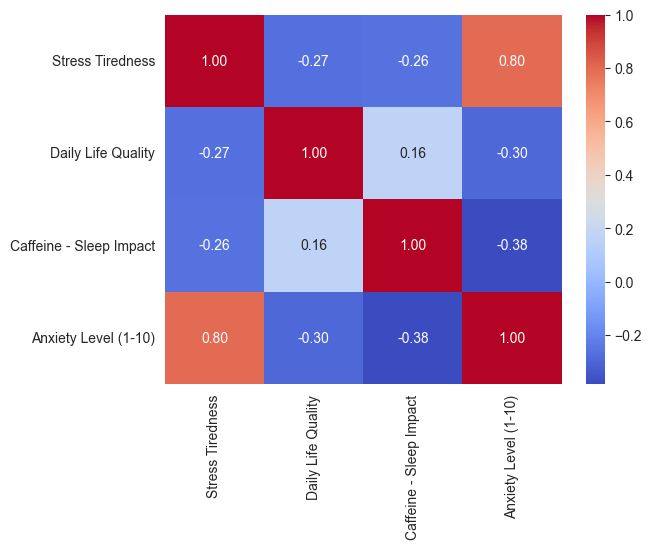

In [18]:
syn_corr = data.loc[:, ["Stress Tiredness", "Daily Life Quality", "Caffeine - Sleep Impact", "Anxiety Level (1-10)"]].corr()

syn_heatmap = sns.heatmap(syn_corr, annot=True, fmt=".2f", cmap="coolwarm")

**The new 'Stress Tiredness Index' seems to score well**, but it may not be the best predictor in conjunction with the other variables. **We'll see how well it performs in the next section.**

Before starting with the classification problem, it's important to both **encode the qualtitative variables and to normalize the variable columns.**

In [19]:
#Binarize the "Yes/No" variables
binarizer = LabelBinarizer()
bin_variables = ["Medication", 'Dizziness', 'Family History of Anxiety', 'Recent Major Life Event', 'Smoking']

for var in bin_variables:
    data[var] = binarizer.fit_transform(data[var])

data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),...,Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10),>= 7,Stress Tiredness,Daily Life Quality,Caffeine - Sleep Impact
0,29,Female,Artist,6.0,2.7,181,10,1,0,10,...,0,1,3,1,7,5.0,False,1.666667,16.20,-121.0
1,46,Other,Nurse,6.2,5.7,200,8,1,1,1,...,1,0,2,0,8,3.0,False,0.161290,35.34,-138.0
2,64,Male,Other,5.0,3.7,117,4,0,1,1,...,0,0,1,1,1,1.0,False,0.200000,18.50,-67.0
3,20,Female,Scientist,5.8,2.8,360,6,1,0,4,...,0,0,0,0,1,2.0,False,0.689655,16.24,-302.0
4,49,Female,Other,8.2,2.3,247,4,1,0,1,...,1,1,1,0,3,1.0,False,0.121951,18.86,-165.0


In [20]:
#Categorize the "Gender" and "Occupation" features
l_encoder = LabelEncoder()
gender_labels = data['Gender'].unique()
occupation_labels = data['Occupation'].unique()

l_encoder.fit(gender_labels)
data['Gender'] = l_encoder.transform(data['Gender'])

l_encoder.fit(occupation_labels)
data['Occupation'] = l_encoder.transform(data['Occupation'])

data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),...,Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10),>= 7,Stress Tiredness,Daily Life Quality,Caffeine - Sleep Impact
0,29,0,0,6.0,2.7,181,10,1,0,10,...,0,1,3,1,7,5.0,False,1.666667,16.20,-121.0
1,46,2,8,6.2,5.7,200,8,1,1,1,...,1,0,2,0,8,3.0,False,0.161290,35.34,-138.0
2,64,1,9,5.0,3.7,117,4,0,1,1,...,0,0,1,1,1,1.0,False,0.200000,18.50,-67.0
3,20,0,10,5.8,2.8,360,6,1,0,4,...,0,0,0,0,1,2.0,False,0.689655,16.24,-302.0
4,49,0,9,8.2,2.3,247,4,1,0,1,...,1,1,1,0,3,1.0,False,0.121951,18.86,-165.0


In [21]:
s = StandardScaler()

y = data['Anxiety Level (1-10)']
y2 = data['>= 7']

data_copy = data.copy()
data_copy.drop(['Anxiety Level (1-10)', ">= 7"], inplace = True, axis = 1)
data_copy = s.fit_transform(data_copy)
data_copy = pd.DataFrame(data_copy, columns = data.columns.drop(['Anxiety Level (1-10)', ">= 7"])) #sklearn can work with dataframes as input, but transform outputs are ndarrays, so to show it needs to be recast

data_copy.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),...,Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Stress Tiredness,Daily Life Quality,Caffeine - Sleep Impact
0,-0.849359,-1.211023,-1.597525,-0.530115,-0.132478,-0.725727,0.052442,0.950496,-1.065213,1.415627,...,-1.348395,0.657245,-1.031777,0.970260,0.262107,0.977881,0.628018,1.282972,-0.283077,0.666751
1,0.435061,1.237062,0.539177,-0.367176,1.508891,-0.594517,-0.299086,0.950496,0.938779,-1.659122,...,0.395834,-0.772538,0.969201,-1.030651,-0.195977,-1.022619,0.973428,-1.364014,1.158372,0.551774
2,1.795036,0.013019,0.806265,-1.344810,0.414645,-1.167696,-1.002141,-1.052082,0.938779,-1.659122,...,1.364850,-0.057646,-1.031777,-1.030651,-0.654060,0.977881,-1.444441,-1.295948,-0.109862,1.031972
3,-1.529347,-1.211023,1.073353,-0.693054,-0.077766,0.510405,-0.650614,0.950496,-1.065213,-0.634206,...,-0.766985,-0.057646,-1.031777,-1.030651,-1.112144,-1.022619,-1.444441,-0.434961,-0.280065,-0.557414
4,0.661724,-1.211023,0.806265,1.262214,-0.351328,-0.269946,-1.002141,0.950496,-1.065213,-1.659122,...,-0.379379,0.657245,0.969201,0.970260,-0.654060,-1.022619,-0.753622,-1.433186,-0.082750,0.369164


## 5. Data Modeling

Now that the dataframe has been standardized, **data is ready to be passed to the models.**

**Let's begin by testing the efficacy of some basic classifiers and then take two or three of the best ones to** be passed onto a search grid to **optimize their hyperparameters.**

### 5.1 10-class approach

Before beginning, **let's have an idea of what is the baseline accuracy for a 10-class approach with a Dummy Classifier.**

In [21]:
results = {}

X_train, X_test, y_train, y_test = train_test_split(data_copy, y, test_size = 0.2, random_state = 42)

DUMMY CLASSIFIER STATS:

F1_MAC: 0.15636363636363637 F1_MIC: 0.10746950994781088 F1_WEIGHT 0.156539007768851 MSE: 9.11


[]

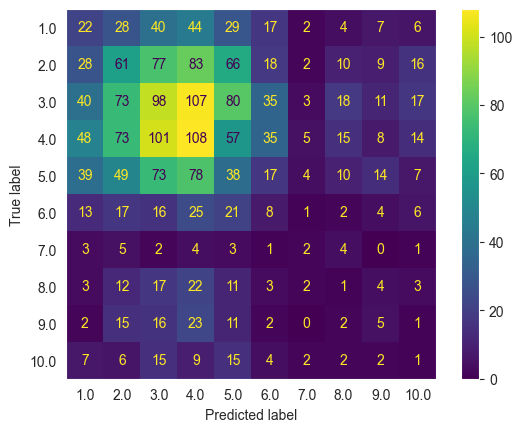

In [22]:
dummy = DummyClassifier(strategy = "stratified", random_state = 42)
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

dum_rec_mic = f1_score(y_test, y_pred, average = "micro") #Use micro to obtain global accuracy of the model independent of target
dum_rec_mac = f1_score(y_test, y_pred, average = "macro") #Use macro to obtain global accuracy without class weight (explained further below)
dum_rec_weighted = f1_score(y_test, y_pred, average = "weighted") #Use weighted to apply individual weight to classes given training proportions.
dum_mse = mean_squared_error(y_test, y_pred) #Use MSE as a global indicator of deviation

print("DUMMY CLASSIFIER STATS:\n")
print("F1_MAC:", dum_rec_mic, "F1_MIC:", dum_rec_mac, "F1_WEIGHT", dum_rec_weighted ,"MSE:", dum_mse)


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.plot()

The F1-scores for the classifier are depicted above the confusion matrix. The F1-score is a statistic that considers how well a classifier performs by taking into account how much it labels correctly (amount of ***T***rue ***P***ositives or $TP$, diagonal values in the confusion matrix) against the amount of mistakes it makes. 

These mistakes in the rows can be interpreted as _how much the classifier missinterpreted a sample that belonged to a certain class_ (amount of ***F***alse ***N***egatives or $FN$) or as mistakes in the columns in the matrix, interpreted as _how much the classifier missed in the sense of not labeling it properly into the correct class_ (columns in the confusion matrix, amount of ***F***alse ***P***ositives or $FP$).

As such the F1-score formula is divided in two components that can be put together in terms of $TP$, $FP$ and $FN$:

$$\text{Precision} = \frac{TP}{TP + FP}$$
$$\text{Recall} = \frac{TP}{TP + FN}$$
$$\text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{2TP}{2TP + FN + FP}$$

The concept of F1-score is class based and such to see how well it performs across the entire classifier, the different F1-scores must be averaged in a way. There are three ways to average this score.

- **Macro:** Compute the F1-score for every class and compute the average value of all F1-scores.
- **Weighted:** Compute the F1-score for every class and compute the _weighted_ average score for each score.
- **Micro:** Compute the F1-score across all categories by not considering individual classes, equivalent to the accuracy score.

Overall, the accuracy score for the dummy baseline case is 0.107 which is quite low. **The Mean Square Error is quite big as** the weighted dummy model's only criteria is to distribute more labels in the most populated classes but **overall assigns labels randomly.** 

In [23]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Ridge': RidgeClassifier(random_state=42),
    'SGD': SGDClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42)
}

for model in models.keys():
    models[model].fit(X_train, y_train)
    y_pred = models[model].predict(X_test)
    f1_mac = f1_score(y_test, y_pred, average="macro")
    f1_mic = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average="weighted")
    mse = mean_squared_error(y_test, y_pred)
    #Use min_auc_score

    results[model] = {'F1_MAC': f1_mac, 'F1_MIC': f1_mic, 'F1_WEIGHT': f1_mac, 'MSE': mse, 'predictions': y_pred}

    print(model, '- F1_MAC: %0.4f, F1_MIC: %0.4f, F1_WEIGHT: %0.4f, MSE: %0.4f' % (f1_mac, f1_mic, f1_weighted, mse))

Random Forest - F1_MAC: 0.2789, F1_MIC: 0.3427, F1_WEIGHT: 0.3342, MSE: 1.3495
Ridge - F1_MAC: 0.2051, F1_MIC: 0.3341, F1_WEIGHT: 0.2892, MSE: 1.5127
SGD - F1_MAC: 0.2218, F1_MIC: 0.3105, F1_WEIGHT: 0.2847, MSE: 1.9995
Gradient Boosting - F1_MAC: 0.2867, F1_MIC: 0.3464, F1_WEIGHT: 0.3410, MSE: 1.4168
Ada Boost - F1_MAC: 0.2223, F1_MIC: 0.3241, F1_WEIGHT: 0.2932, MSE: 1.7650
MLP - F1_MAC: 0.3039, F1_MIC: 0.3405, F1_WEIGHT: 0.3382, MSE: 1.4350


C:\Users\Javier\Documents\Python\MentalHealth\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


As shown, **the best 4 models seem to be Random Forest, Gradient Boosting, the Multilayered Perceptron and the Ridge Classifier** in their basic status.

To be better view the accuracy in the models, **let's display the confusion matrix for each model and view how well the predictors work on the grid.**

Let's try and build a Grid Search with cross validation with these tree models and check whether better scores can be achieved.

[]

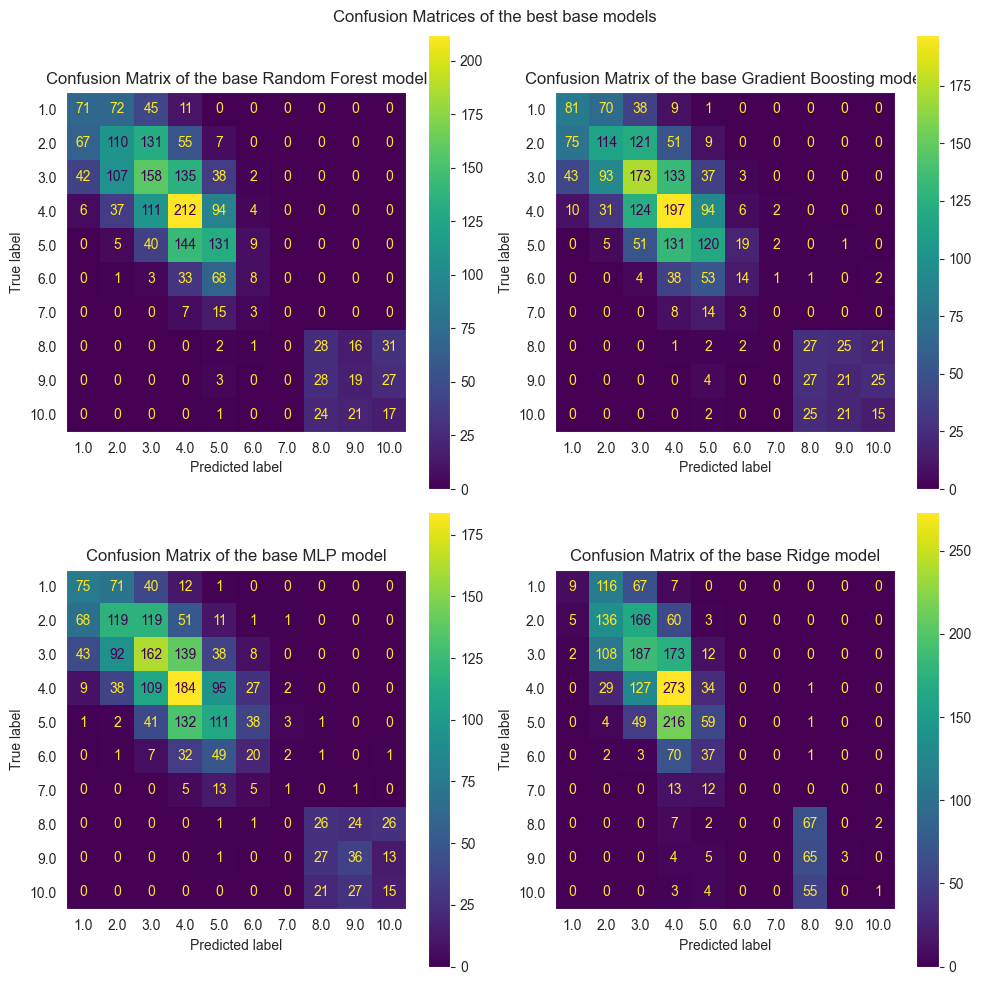

In [24]:
selected_models = ["Random Forest", "Gradient Boosting", "MLP", "Ridge"]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10), tight_layout = True)
fig.suptitle("Confusion Matrices of the best base models")
for model, ax in zip(selected_models, axes.flatten()):
    ConfusionMatrixDisplay.from_predictions(y_test, results[model]['predictions'], ax = ax)
    ax.grid(False)
    ax.title.set_text("Confusion Matrix of the base " + model + " model")


plt.plot()


In [25]:
# Declare parameter selection

rf_parameters = {'n_estimators': [100, 150, 200, 250, 300],
                 'max_depth': [None, 5, 10, 20],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2],
                 'bootstrap': [True, False]}
mlp_parameters = {'hidden_layer_sizes': [(100,), (200, ), (300, ), (100, 100), (100, 200), (200, 100), (300, 100), (100, 300)],
                  'activation': ['relu', 'tanh', 'logistic'],
                  'solver': ['adam', 'sgd'],
                  'learning_rate': ['invscaling', 'constant', 'adaptive'],
                  'max_iter': [200, 500, 1000]}
gb_parameters = {'n_estimators': [20, 50, 100],
                 'loss':['log_loss'],
                 'max_depth': [3, 5, 10],
                 'min_samples_split': [2, 5],
                 'warm_start': [True, False],
                 'learning_rate': [0.001, 0.01, 0.1, 1.0]
                 }

In [26]:
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_parameters, cv=5, n_jobs=-1)
grid_search_mlp = GridSearchCV(MLPClassifier(random_state=42), param_grid=mlp_parameters, cv=5, n_jobs=-1)
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=gb_parameters, cv=5, n_jobs=-1)

refined_grids = {'Random Forest': grid_search_rf,
                 'MLP': grid_search_mlp,
                 'Gradient Boosting': grid_search_gb}

In [27]:
grid_results = {}

In [28]:
#WARNING: FOLD TESTING CELL. IF EXECUTED IT COULD TAKE A LONG TIME TO FINISH
for grid in refined_grids.keys():

    refined_grids[grid].fit(X_train, y_train)

    print("Grid Search ", grid, "Best Parameters:", refined_grids[grid].best_params_)

    y_pred = refined_grids[grid].predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    grid_results[grid] = {'MSE': mse, 'predictions': y_pred}

Grid Search  Random Forest Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Grid Search  MLP Best Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (300,), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
Grid Search  Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 20, 'warm_start': True}


**Let's plot the expected labels against the true labels in a Confusion Matrix to check for performance.**

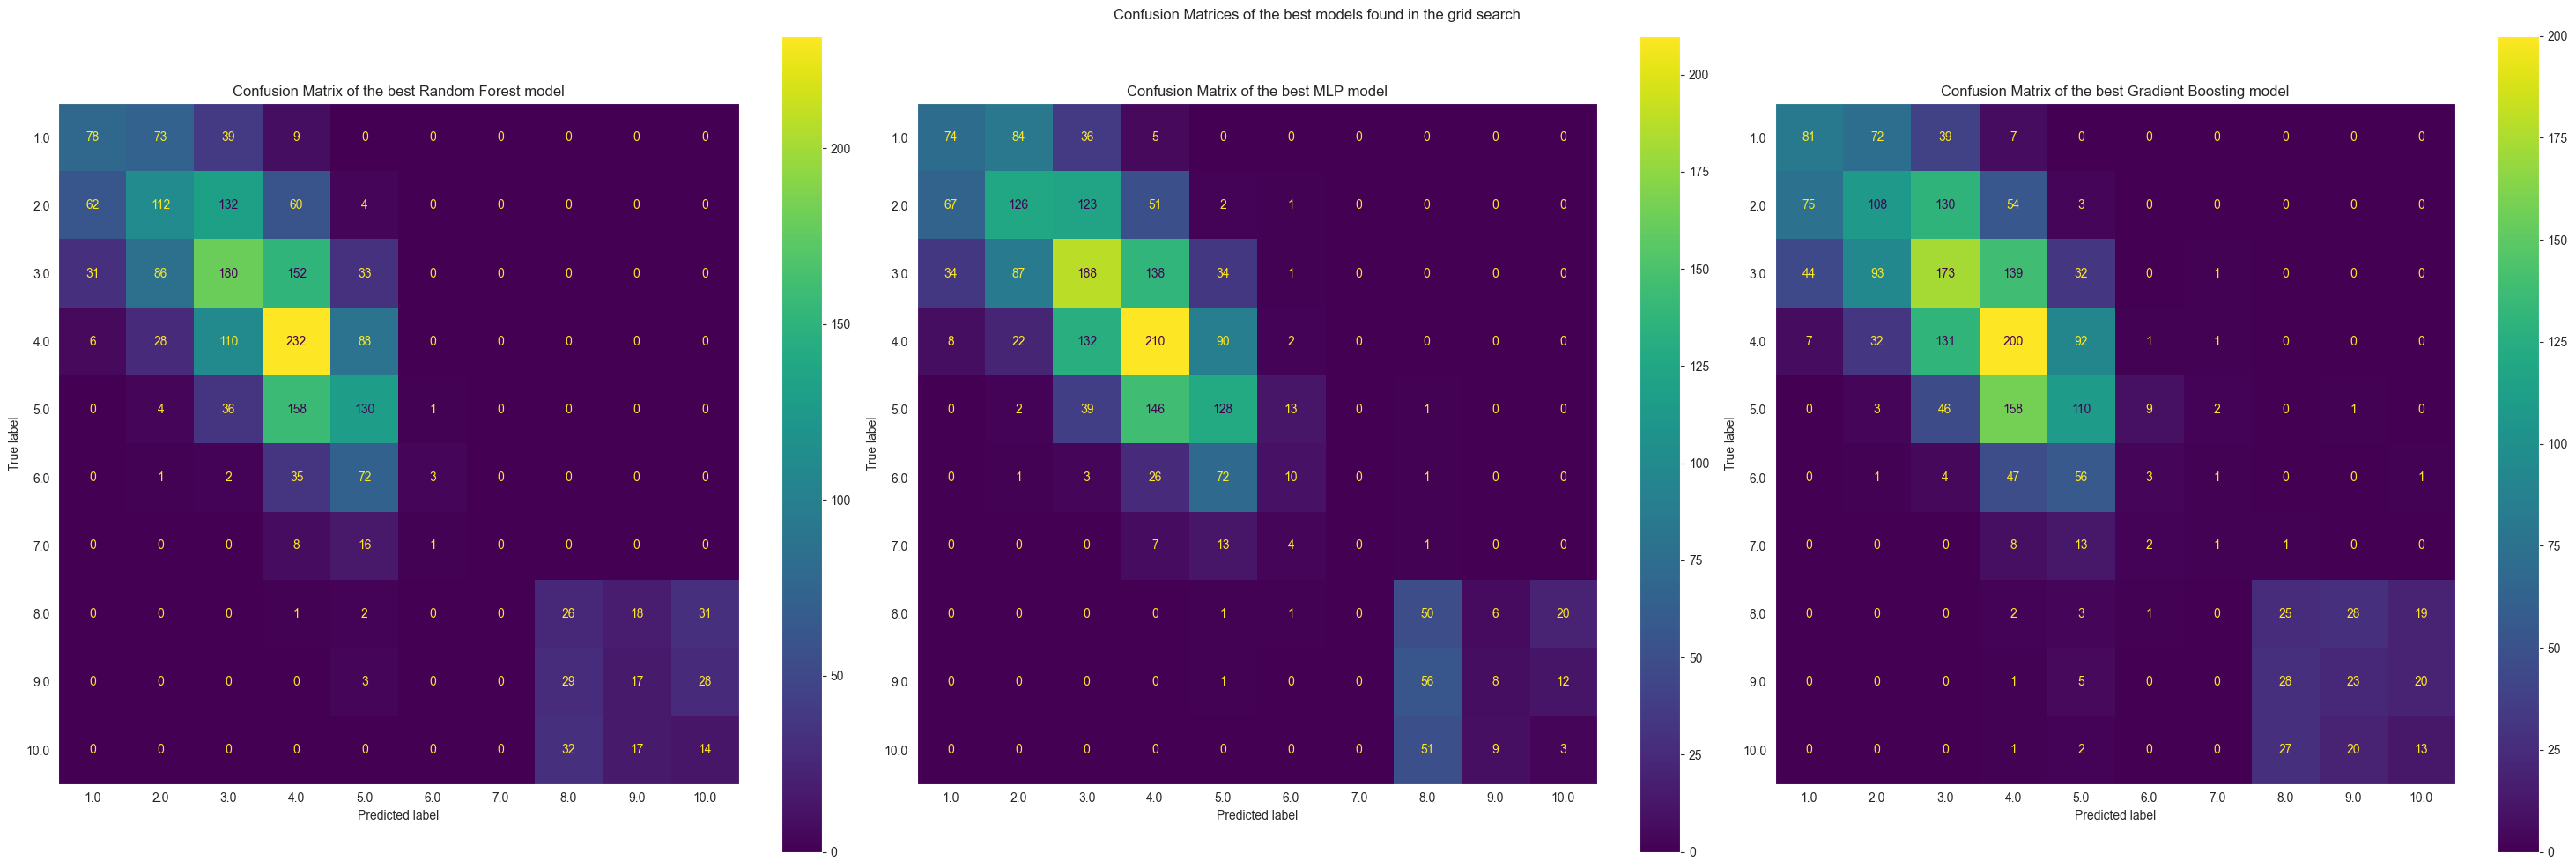

In [51]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10), tight_layout = True)
fig.suptitle("Confusion Matrices of the best models found in the grid search")
for model, ax in zip(grid_results.keys(), axes.flatten()):
    ConfusionMatrixDisplay.from_predictions(y_test, grid_results[model]['predictions'], ax = ax)
    ax.grid(False)
    ax.title.set_text("Confusion Matrix of the best " + model + " model")



A shown in the matrices, performance is low, with a mean accuracy of around 36%. High anxiety cases are much lower in count than low anxiety cases. In this sense, the models have a harder time differentiating classes that belong to groups that have lower appereances in the dataset. As seen in the EDA, two main groups, high (>= 7) and low (< 7) can be detected inside the confusion matrices themselves as two separated cloud regions.

In any case, it would be a good idea to check individual machine accuracy by **checking out their different recall scores.**

In [30]:
rec_types = ['macro', 'micro', 'weighted'] 

for rec_type in rec_types:
    f1_rf = f1_score(y_test, grid_results['Random Forest']['predictions'], average=rec_type)
    f1_mlp = f1_score(y_test, grid_results['MLP']['predictions'], average=rec_type)
    f1_gb = f1_score(y_test, grid_results['Gradient Boosting']['predictions'], average=rec_type)

    print(rec_type.upper(), " RECALL")
    print("Random Forest: ", f1_rf, "MLP: ", f1_mlp, "Gradient Boost: ", f1_gb ,"\n")

print("MEAN SQUARE ERRORS")
print("Random Forest: ", grid_results["Random Forest"]["MSE"], " MLP: ", grid_results['MLP']['MSE'], " Gradient Boost: ", grid_results['Gradient Boosting']['MSE'])

MACRO  RECALL
Random Forest:  0.2748360735090086 MLP:  0.2689031054112701 Gradient Boost:  0.2730877212498953 

MICRO  RECALL
Random Forest:  0.36 MLP:  0.36227272727272725 Gradient Boost:  0.335 

WEIGHTED  RECALL
Random Forest:  0.34761662453507214 MLP:  0.34950228085626295 Gradient Boost:  0.32556735688951527 

MEAN SQUARE ERRORS
Random Forest:  1.2663636363636364  MLP:  1.2172727272727273  Gradient Boost:  1.4063636363636363


Seeing the different scores, it is actually quite hard to pinpoint which is the best classifier.

**The MLP Classifier has the best micro F1-score**, which means that it is the most accurate of the three predictors. However, it can be seen by looking at the confusion matrix that **one of the reasons why it has the worst macro F1-score is because it tends to overfit high anxiety scores towards level 8.**

**Random Forest has a lower accuracy** than the MLP Classifier, **but does slightly better in the Macro score.** The **weighted score seems to favor the MLP classifier** rather than the macro score. 

In this sense, **which of the two is better overall is arguable**, since Random Forest labels correctly more of the samples that belong to groups with lower populations.

Compared to the base models, and of course, to the dummy model **the mean square error has lowered**. Meaning also that **the missclassified labels actually lay near their actual true value.** 

**However**, overall, **the F1-score is very low for the multiclass problem, not being able to even score half of the samples correctly.**

### 5.2 2-class approach

As it was seen in the EDA and in the previous section, **model accuracy takes a hit due to class imbalance**. A few **alternatives** come into mind as to obtain better models and these **will be tackled in posterior updates of this notebook.**

However, **the most intuitive approach to obtain a better score is to change the optics of the problem and reduce the problem from a 10-class problem to a 2-class problem** since the **divisive regions** of the histogram and the EDA of the most correlated variables showed the division **between two groups thanks to the estimated kernel densities.**

**This approach of course has many issues, such as ignoring the mere approach of what each individual Anxiety Level entails.** But the use of a classifier like this one **can be useful to confirm whether if a shy individual is at risk of belonging to one of the high social anxiety groups without intromssion** by knowing someone's habits.

In [31]:
y2 = np.where(y2, 1, 0)
X2_train, X2_test, y2_train, y2_test = train_test_split(data_copy, y2, test_size = 0.2, random_state = 42)

DUMMY CLASSIFIER STATS:

MACRO F1: 0.5069054711244526 , MICRO F1: 0.815 , WEIGHTED F1: 0.8105708089580858 , MSE: 0.185


[]

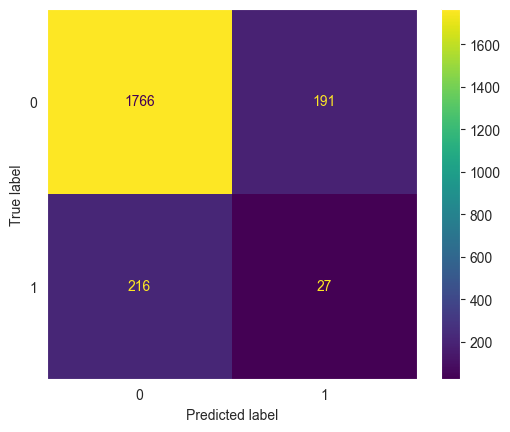

In [32]:
#DummyClassifier as a reference once again.
dummy2 = DummyClassifier(strategy = "stratified", random_state = 42)
dummy2.fit(X2_train, y2_train)
y2_pred = dummy2.predict(X2_test)

dum2_f1_mic = f1_score(y2_test, y2_pred, average = "micro") #Use micro to obtain global accuracy of the model independent of target
dum2_f1_mac = f1_score(y2_test, y2_pred, average = "macro") #Use macro to obtain global accuracy with class weight (explained further below)
dum2_f1_weighted = f1_score(y2_test, y2_pred, average = "weighted")
dum2_mse = mean_squared_error(y2_test, y2_pred) #Use MSE as a global indicator of deviation

print("DUMMY CLASSIFIER STATS:\n")
print("MACRO F1:", dum2_f1_mac, ", MICRO F1:", dum2_f1_mic,", WEIGHTED F1:" , dum2_f1_weighted ,", MSE:", dum2_mse)


ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred)
plt.grid(False)
plt.plot()

Given the class imbalance of the two labels and the strategy the Dummy Classifier uses, **micro recall is high and macro recall is small**. The ```stratified``` strategy **takes into account the proportions inside of the target variable and picks randomly** according to said distribution.

In this sense, **micro score is high** since the classifier will pick **many more zeros than ones** (as the distribution shows). **Macro score is much lower** since the predictor **misses most of its ones.**

Since **the point** of the classifier is for it **not to miss its target in an imbalanced problem**, the micro recall is the one to aim for improving.

Mean Square Error is way down compared with the Dummy Classifier in the 10-class case since there are only two labels in this case.

Let's view performance for the basic classifiers used in the 10-case problem once again.

In [33]:
results2 = {}

models2 = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Ridge': RidgeClassifier(random_state=42),
    'SGD': SGDClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=500),
}

for model in models2.keys():
    models2[model].fit(X2_train, y2_train)
    y2_pred = models2[model].predict(X2_test)
    f1_mac = f1_score(y2_test, y2_pred, average="macro")
    f1_mic = f1_score(y2_test, y2_pred, average="micro")
    f1_weighted = f1_score(y2_test, y2_pred, average="weighted")
    mse2 = mean_squared_error(y2_test, y2_pred)
    #Use min_auc_score

    results2[model] = {'MACRO F1': f1_mac, 'MICRO F1': f1_mic, 'WEIGHTED F1': f1_weighted, 'MSE': mse2, 'predictions': y2_pred}

    print(model, ': F1_MAC: %0.4f, F1_MIC: %0.4f, F1_WEIGHT: %0.4f, MSE: %0.4f' % (f1_mac, f1_mic, f1_weighted , mse2))

Random Forest : F1_MAC: 0.9620, F1_MIC: 0.9859, F1_WEIGHT: 0.9855, MSE: 0.0141
Ridge : F1_MAC: 0.9496, F1_MIC: 0.9814, F1_WEIGHT: 0.9808, MSE: 0.0186
SGD : F1_MAC: 0.9637, F1_MIC: 0.9864, F1_WEIGHT: 0.9861, MSE: 0.0136
Gradient Boosting : F1_MAC: 0.9615, F1_MIC: 0.9855, F1_WEIGHT: 0.9852, MSE: 0.0145
Ada Boost : F1_MAC: 0.9415, F1_MIC: 0.9773, F1_WEIGHT: 0.9771, MSE: 0.0227
MLP : F1_MAC: 0.9418, F1_MIC: 0.9773, F1_WEIGHT: 0.9772, MSE: 0.0227


Overall, **the binary classifiers are much more better performance wise, specially with respect the macro and MSE**. In this case, it's hard to judge which are actually the best classifiers since all perform well and the difference between scores is little.

[]

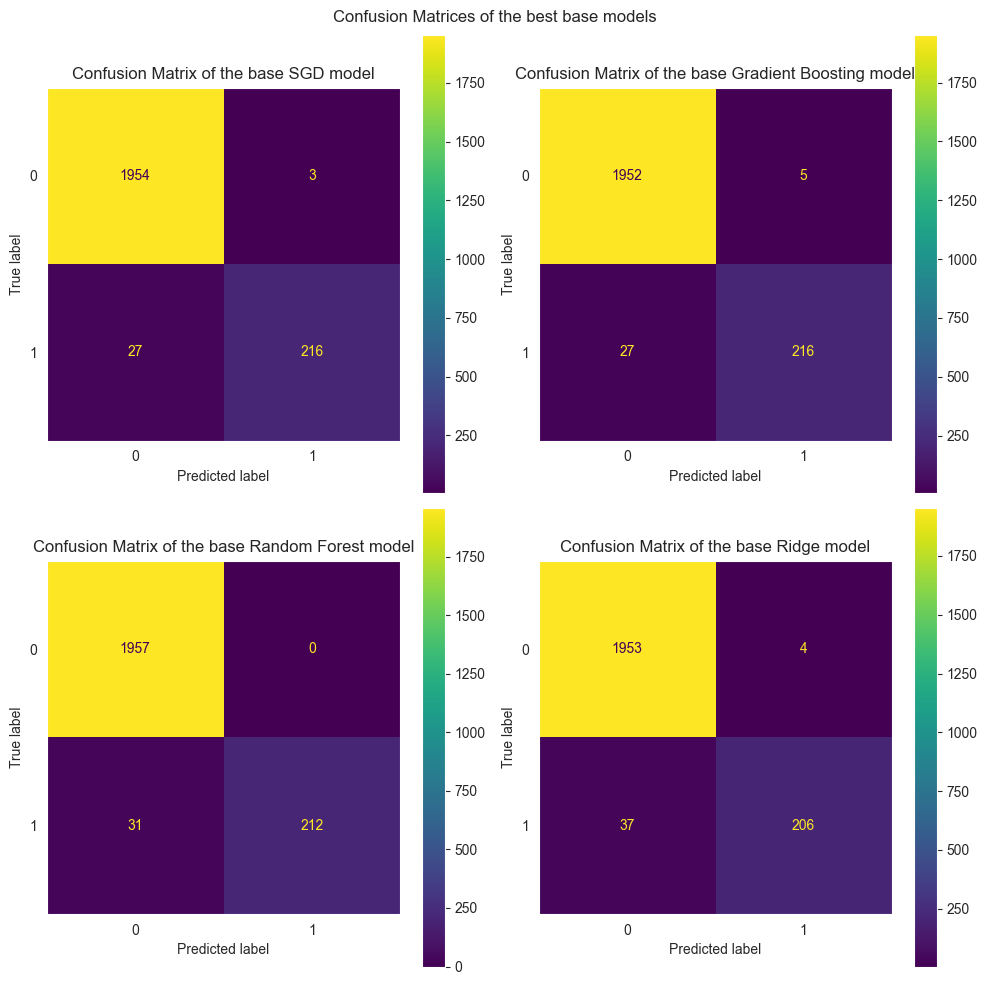

In [34]:
selected_models = ["SGD", "Gradient Boosting", "Random Forest", "Ridge"]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10), tight_layout = True)
fig.suptitle("Confusion Matrices of the best base models")
for model, ax in zip(selected_models, axes.flatten()):
    ConfusionMatrixDisplay.from_predictions(y2_test, results2[model]['predictions'], ax = ax)
    ax.grid(False)
    ax.title.set_text("Confusion Matrix of the base " + model + " model")


plt.plot()

**All of these four models work well for resolving the binary problem. Let's try and see if this rate can be taken further down by doing a grid search.**

In [35]:
# Declare parameter selection

rf2_parameters = {'n_estimators': [100, 150, 200, 250, 300],
                 'max_depth': [None, 5, 10, 20],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2],
                 'bootstrap': [True, False]}

sgd2_parameters = {'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
                   'penalty': ['l2', 'l1', 'elasticnet'],
                   'alpha': [1e-1, 1e-3, 1e-6],
                   'l1_ratio': [0.1, 0.01, 0.5, 0.9],
                   'max_iter': [200, 500, 1000],
                   'warm_start': [True, False],
                   'eta0': [0.1, 0.01, 0.05, 0.2, 0.5], 
                   'learning_rate': ['invscaling', 'adaptive', 'optimal'],
                   'early_stopping': [True]

    }
gb2_parameters = {'n_estimators': [20, 50, 100],
                 'loss': ['log_loss'],
                 'max_depth': [3, 5, 10],
                 'min_samples_split': [2, 5],
                 'warm_start': [True, False],
                 'learning_rate': [0.001, 0.01, 0.1, 1.0]
                 }
ridge2_parameters =  {'alpha': [1.0, 1.5, 2.0, 3.0, 5.0],
                      'tol': [1e-4, 1e-5],
                      'max_iter': [100, 200, 500, 1000],
                      'class_weight': [None, 'balanced'],
                      'solver': ['svd', 'cholesky', 'sag', 'saga', 'lsqr', 'sparse_cg'],
                      'random_state': [42]}


In [36]:
grid_search_rf2 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf2_parameters, cv=5, n_jobs=-1)
grid_search_sgd2 = GridSearchCV(SGDClassifier(random_state=42), param_grid=sgd2_parameters, cv=5, n_jobs=-1)
grid_search_gb2 = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=gb2_parameters, cv=5, n_jobs=-1)
grid_search_ridge2 = GridSearchCV(RidgeClassifier(random_state=42), param_grid=ridge2_parameters, cv=5, n_jobs=-1)

refined_grids2 = {'Random Forest': grid_search_rf2,
                 'SGD': grid_search_sgd2,
                 'Gradient Boosting': grid_search_gb2,
                 'Ridge': grid_search_ridge2}

In [37]:
grid_results2  = {}

In [38]:
#WARNING: FOLD TESTING CELL. IF EXECUTED IT COULD TAKE A LONG TIME TO FINISH
for grid in refined_grids2.keys():

    refined_grids2[grid].fit(X2_train, y2_train)

    print("Grid Search ", grid, "Best Parameters:", refined_grids2[grid].best_params_)

    y2_pred = refined_grids2[grid].predict(X2_test)

    f1_mac2 = f1_score(y2_test, y2_pred, average="macro")
    f1_mic2 = f1_score(y2_test, y2_pred, average="micro")
    f1_weighted = f1_score(y2_test, y2_pred, average="weighted")
    mse2 = mean_squared_error(y2_test, y2_pred)

    grid_results2[grid] = {'F1_MAC': f1_mac2, 'F1_MIC': f1_mic2, 'F1_WEIGHT': f1_weighted, 'MSE': mse2, 'predictions': y2_pred}

    print(grid, ': F1_MAC: %0.4f, F1_MIC: %0.4f, F1_WEIGHT: %0.4f, MSE: %0.4f' % (f1_mac2, f1_mic2, f1_weighted , mse2))
    print("\n")

Grid Search  Random Forest Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Random Forest : F1_MAC: 0.9633, F1_MIC: 0.9864, F1_WEIGHT: 0.9860, MSE: 0.0136


Grid Search  SGD Best Parameters: {'alpha': 0.1, 'early_stopping': True, 'eta0': 0.05, 'l1_ratio': 0.01, 'learning_rate': 'invscaling', 'loss': 'hinge', 'max_iter': 200, 'penalty': 'elasticnet', 'warm_start': True}
SGD : F1_MAC: 0.9636, F1_MIC: 0.9864, F1_WEIGHT: 0.9860, MSE: 0.0136


Grid Search  Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50, 'warm_start': True}
Gradient Boosting : F1_MAC: 0.9661, F1_MIC: 0.9873, F1_WEIGHT: 0.9870, MSE: 0.0127


Grid Search  Ridge Best Parameters: {'alpha': 3.0, 'class_weight': None, 'max_iter': 100, 'random_state': 42, 'solver': 'sag', 'tol': 0.0001}
Ridge : F1_MAC: 0.9496, F1_MIC: 0.9814, F1_WEIGHT: 0.9808, MSE: 0.0186




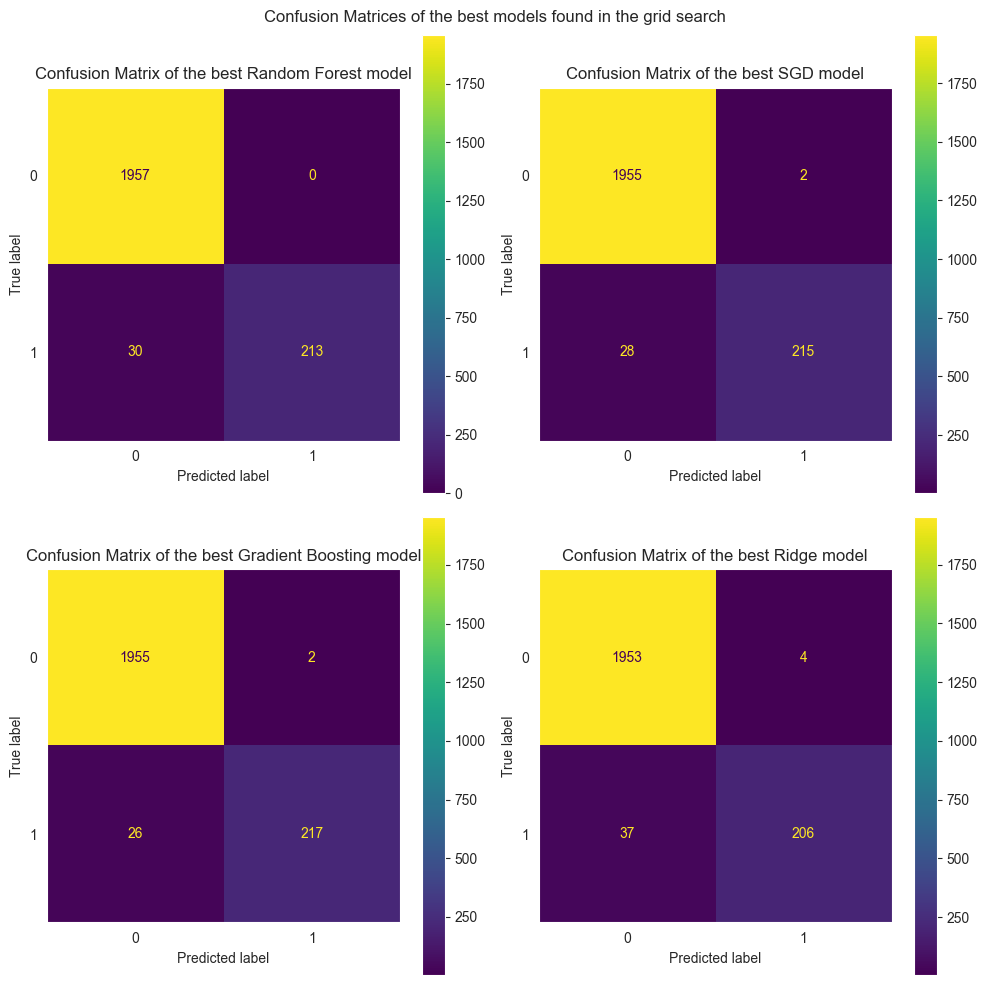

In [39]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize= (10, 10), tight_layout = True)
fig.suptitle("Confusion Matrices of the best models found in the grid search")
for model, ax in zip(grid_results2.keys(), axes.flatten()):
    ConfusionMatrixDisplay.from_predictions(y2_test, grid_results2[model]['predictions'], ax = ax)
    ax.grid(False)
    ax.title.set_text("Confusion Matrix of the best " + model + " model")

The confusion matrices and their recall scores are quite similar. Although the **Random Forest Model successes in classifying correctly all true low anxiety labels**, it is **not the model that successfully classifies the most high anxiety labels**. Since the point is to **find a reliable detector** that classifies correctly the people with **a high social anxiety profile**, the best classifier is the one based on the **Gradient Boosting** model. **This is also the class that has the highest F1-scores overall.**

Before ending, let's see which variables are the most influential for the classifier.

In [40]:
regressors_dict = {name: [value] for name, value in zip(data_copy.columns, list(refined_grids2['Gradient Boosting'].best_estimator_.feature_importances_))} ##Get feature impurities to obtain importances

regressors_dict = {k:v for k, v in sorted(regressors_dict.items(), key = lambda item:item[1])} ##Order the features by order of importance

regressors = pd.DataFrame(regressors_dict)

In [41]:
regressors

,Dizziness,Smoking,Recent Major Life Event,Family History of Anxiety,Gender,Medication,Stress Level (1-10),Occupation,Alcohol Consumption (drinks/week),Sweating Level (1-5),...,Age,Sleep Hours,Heart Rate (bpm),Physical Activity (hrs/week),Daily Life Quality,Caffeine Intake (mg/day),Diet Quality (1-10),Caffeine - Sleep Impact,Therapy Sessions (per month),Stress Tiredness
0,0.0,0.00002,0.000078,0.000118,0.000241,0.000501,0.002409,0.003271,0.003528,0.00467,...,0.005685,0.006065,0.009624,0.010554,0.0136,0.016817,0.027854,0.028565,0.201907,0.659502


C:\Users\Javier\AppData\Local\Temp\ipykernel_12804\3208897668.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


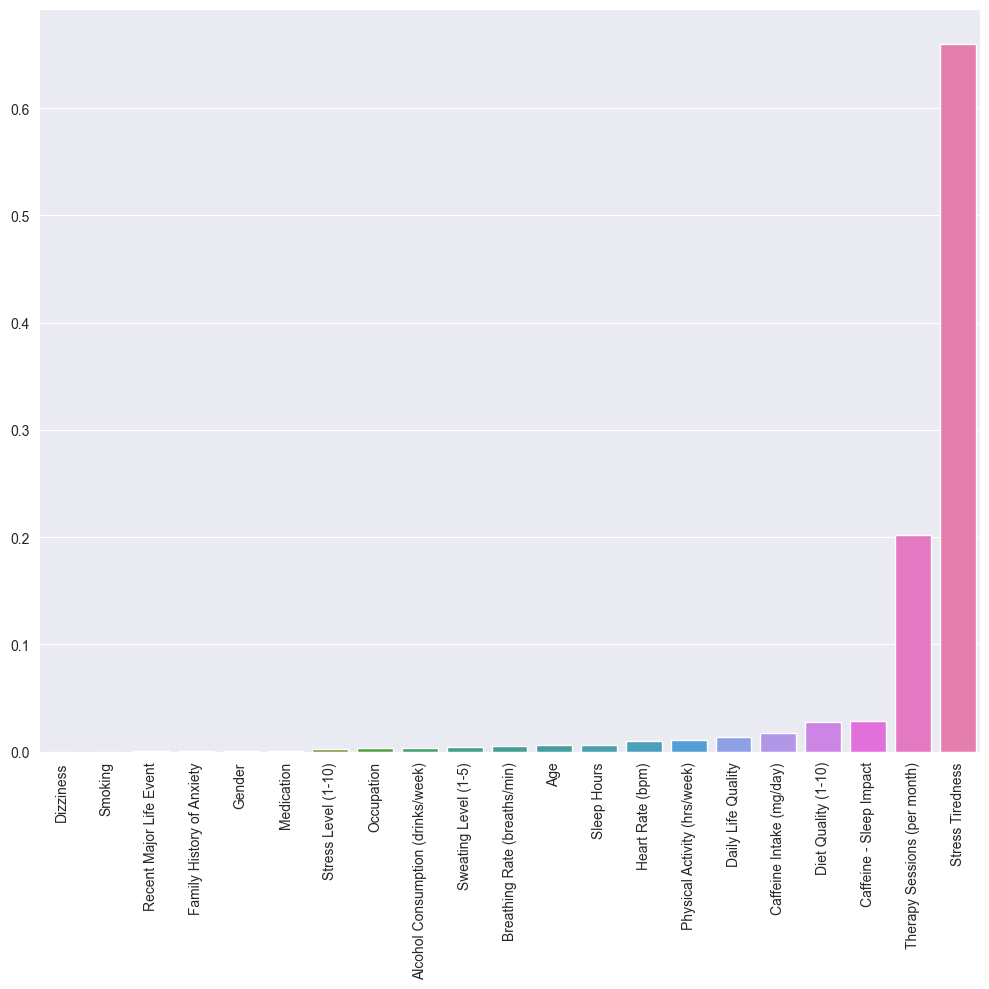

In [42]:
plt.figure(figsize = (10, 10), tight_layout = True)
g = sns.barplot(regressors)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

**The new synthetic variables seem to contribute positively to the classifier**, specially **Stress Tiredness** - it being **the most relevant feature of the best classifier found with hyperparameter tuning.** Caffeine/Sleep Impact scores in third position, while Life Quality scores in sixth. There are **vast differences between the two most influential variables and the rest.** Encoded qualitative variables overall come in last in relevance.

## 6. Conclusions and possible expansions of the case study

Overall, **it has been shown how much stress and sleeping quality (in terms of hours) affect individuals with high social anxiety both in the EDA and the 2-class model feature importance.** Although it has not been possible to increase accuracy properly in the 10-class original scenario, some classifiers that lower significantly the MSE of the dummy classifier baseline have been obtained.

Simplifying the problem into finding a model with 2 classes has its usefulness to detect the most relevant indicators for both apparent population groups, people with self-reported "low" social anxiety (Levels 1 - 6) and the more uncommon but far more impactful "high" social anxiety (Levels 7 - 10). While the results of this analysis/case study **SHOULD NOT be used for real life case diagnoses given its synthetic nature**, it gives us **a first approach scenario into the lifestyle of people with high social anxiety** as the samples contained within are deemed realistic in nature according to source.

### 6.1. Possible improvements

The main issue found in these models has to do with two main aspects: **class imbalance** and **multiclass prediction**.

There are already available methods to mitigate these problems, such as the use of **Synthetic Minority Oversampling TEchnique** (or **SMOTE** for short) to correct population class imbalance. This technique consists in using k-Nearest Neighbors with samples of minority groups in the vectorial space and synthesize the new samples as the result of interpolation between neighbors. The **Adaptive Synthetic (ADASYN)** algorithm works similarly but it also considers sampling in areas where classification is difficult.

**A One-vs-Rest approach to multiclass could be interesting to explore as to gain further insight in concrete classes to view the influence of specific features inside every individual class.**

Finally, exploration of different **ensemble models (Random Under Sampling, Balanced Bagging and Balanced Random Forest)** can also be tackled in order to address the accuracy problem. Other strong models that have not been used in this notebook such as **XGBoost** could also be used.

## 7. Solving the class imbalance problem: ADASYN

In the 10-class scenario, the biggest issue was a lack of precision when assigning classes. Although the models found in section 5.1. fare much better than the dummy/baseline model when it comes to precision, the f1-score is still quite poor. Supposedly, this is caused by the class imbalance found in the dataset's target variables.

To fix this, SMOTE and ADASYN can be used. The objective of this section is to **improve performance** with regards of the best results obtained before.

In [22]:
smote = SMOTE(random_state=42, sampling_strategy='not majority')
print("Original distribution of \"y\" labels: ", Counter(y))

X_resampled, y_resampled = smote.fit_resample(data_copy, y)
print("New Sampling distribution of the \"y\" labels", Counter(y_resampled))

Original distribution of "y" labels:  Counter({4.0: 2416, 3.0: 2407, 2.0: 1756, 5.0: 1629, 1.0: 1039, 6.0: 616, 8.0: 363, 9.0: 329, 10.0: 322, 7.0: 123})
New Sampling distribution of the "y" labels Counter({5.0: 2416, 3.0: 2416, 1.0: 2416, 2.0: 2416, 4.0: 2416, 9.0: 2416, 7.0: 2416, 8.0: 2416, 6.0: 2416, 10.0: 2416})


Before starting with the other models lets observe the point distribution of the variables in a scatterplot to view the influence of SMOTE over on the dataset.

[]

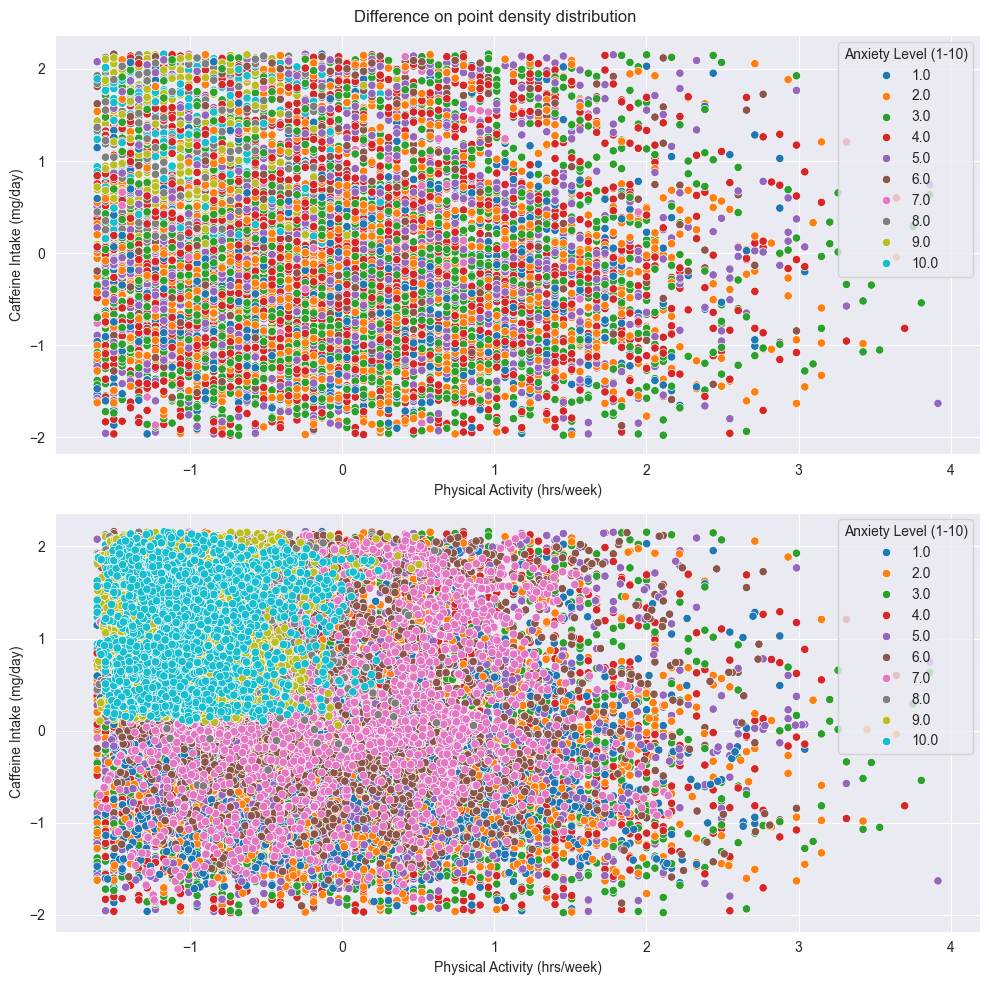

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10), tight_layout = True)
fig.suptitle("Difference on point density distribution")
sns.scatterplot(data = data_copy, x = "Physical Activity (hrs/week)", y = "Caffeine Intake (mg/day)", hue = y, palette = "tab10", ax = ax1)
sns.scatterplot(data = X_resampled, x = "Physical Activity (hrs/week)", y = "Caffeine Intake (mg/day)", hue = y_resampled, palette = "tab10",  ax = ax2)
plt.plot()

As it can be seen, oversampling has helped to see in the scatterplot the areas where Anxiety above 7 have more influence. Let's view then if models can improve with the new data.

In [ ]:
results = {}

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)

DUMMY CLASSIFIER STATS:

F1_MAC: 0.10140728476821192 F1_MIC: 0.1014037568253334 F1_WEIGHT 0.10121496056026498 MSE: 16.299254966887418


[]

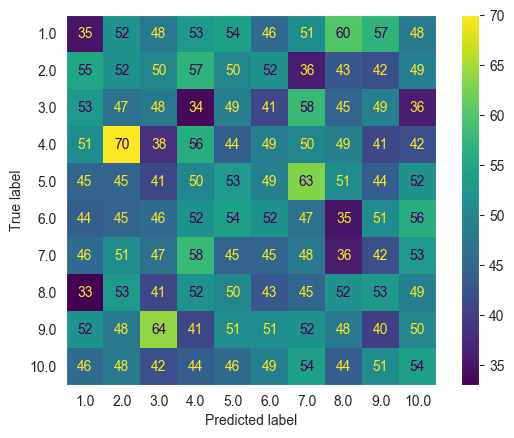

In [25]:
dummy = DummyClassifier(strategy = "stratified", random_state = 42)
dummy.fit(X_train_res, y_train_res)
y_pred_res = dummy.predict(X_test_res)

dum_rec_mic = f1_score(y_test_res, y_pred_res, average = "micro") #Use micro to obtain global accuracy of the model independent of target
dum_rec_mac = f1_score(y_test_res, y_pred_res, average = "macro") #Use macro to obtain global accuracy without class weight (explained further below)
dum_rec_weighted = f1_score(y_test_res, y_pred_res, average = "weighted") #Use weighted to apply individual weight to classes given training proportions.
dum_mse = mean_squared_error(y_test_res, y_pred_res) #Use MSE as a global indicator of deviation

print("DUMMY CLASSIFIER STATS:\n")
print("F1_MAC:", dum_rec_mic, "F1_MIC:", dum_rec_mac, "F1_WEIGHT", dum_rec_weighted ,"MSE:", dum_mse)


ConfusionMatrixDisplay.from_predictions(y_test_res, y_pred_res)
plt.grid(False)
plt.plot()

In [26]:
results3 = {}

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Ridge': RidgeClassifier(random_state=42),
    'SGD': SGDClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'XGB': xgb.XGBClassifier(random_state=42)
}

#XGBoost works with encoded labels based on the LabelEncoder from scikit-learn
encoder = LabelEncoder()
y_xgb_train = encoder.fit_transform(y_train_res)
y_xgb_test = encoder.transform(y_test_res)

for model in models.keys():

    if model == 'XGB':
        models[model].fit(X_train_res, y_xgb_train)
        y_pred_res = models[model].predict(X_test_res)
        f1_mac = f1_score(y_xgb_test, y_pred_res, average="macro")
        f1_mic = f1_score(y_xgb_test, y_pred_res, average="micro")
        f1_weighted = f1_score(y_xgb_test, y_pred_res, average="weighted")
        mse = mean_squared_error(y_xgb_test, y_pred_res)
    else:
        models[model].fit(X_train_res, y_train_res) 
        y_pred_res = models[model].predict(X_test_res)
        f1_mac = f1_score(y_test_res, y_pred_res, average="macro")
        f1_mic = f1_score(y_test_res, y_pred_res, average="micro")
        f1_weighted = f1_score(y_test_res, y_pred_res, average="weighted")
        mse = mean_squared_error(y_test_res, y_pred_res)
    #Use min_auc_score

    results3[model] = {'F1_MAC': f1_mac, 'F1_MIC': f1_mic, 'F1_WEIGHT': f1_mac, 'MSE': mse, 'predictions': y_pred_res}

    print(model, '- F1_MAC: %0.4f, F1_MIC: %0.4f, F1_WEIGHT: %0.4f, MSE: %0.4f' % (f1_mac, f1_mic, f1_weighted, mse))

Random Forest - F1_MAC: 0.7276, F1_MIC: 0.7347, F1_WEIGHT: 0.7277, MSE: 0.5919
Ridge - F1_MAC: 0.2786, F1_MIC: 0.3367, F1_WEIGHT: 0.2799, MSE: 2.6149
SGD - F1_MAC: 0.3020, F1_MIC: 0.3380, F1_WEIGHT: 0.3033, MSE: 2.2475
Gradient Boosting - F1_MAC: 0.5274, F1_MIC: 0.5317, F1_WEIGHT: 0.5276, MSE: 1.0470
Ada Boost - F1_MAC: 0.2370, F1_MIC: 0.2649, F1_WEIGHT: 0.2376, MSE: 2.2413


C:\Users\Javier\Documents\Python\MentalHealth\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - F1_MAC: 0.6120, F1_MIC: 0.6196, F1_WEIGHT: 0.6120, MSE: 0.9570
XGB - F1_MAC: 0.6828, F1_MIC: 0.6819, F1_WEIGHT: 0.6828, MSE: 0.7572


[]

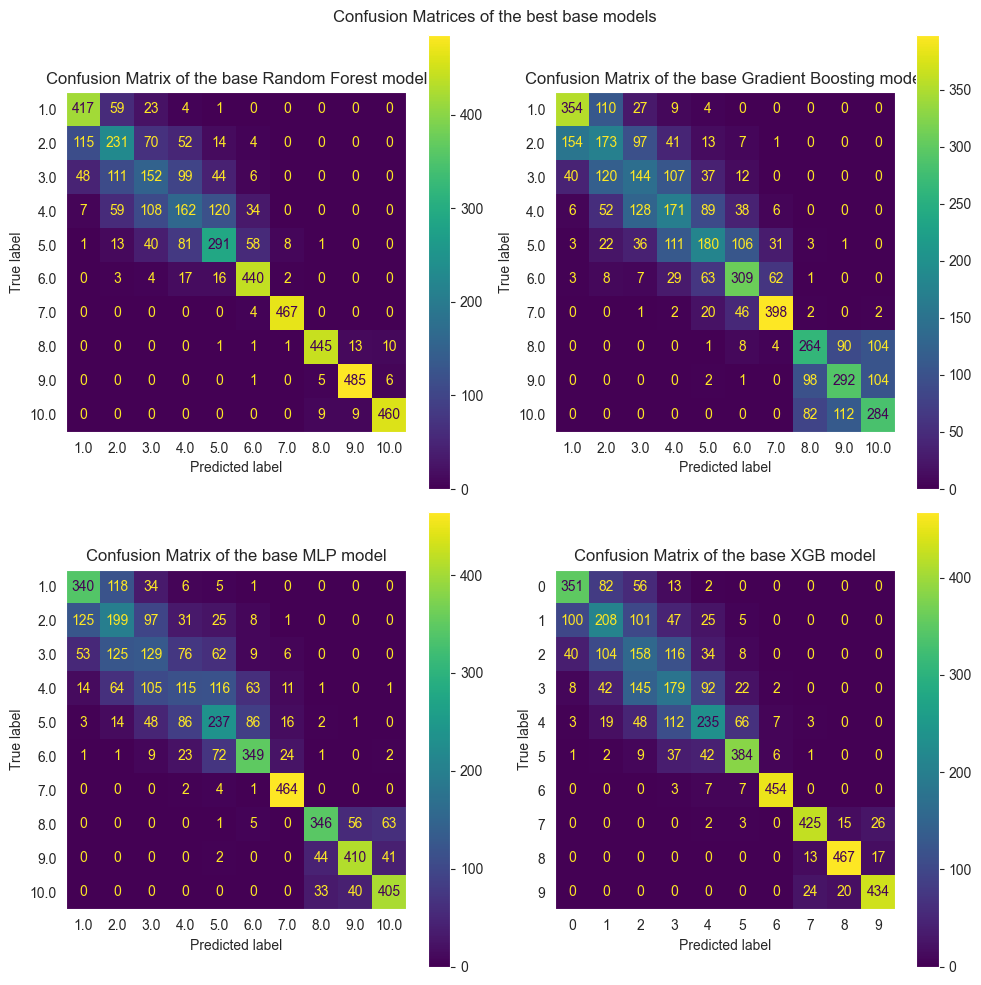

In [27]:
selected_models = ["Random Forest", "Gradient Boosting", "MLP", "XGB"]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10), tight_layout = True)
fig.suptitle("Confusion Matrices of the best base models")
for model, ax in zip(selected_models, axes.flatten()):
    if model == 'XGB':
        ConfusionMatrixDisplay.from_predictions(y_xgb_test, results3[model]['predictions'], ax = ax)
    else:
        ConfusionMatrixDisplay.from_predictions(y_test_res, results3[model]['predictions'], ax = ax)
        
    ax.grid(False)
    ax.title.set_text("Confusion Matrix of the base " + model + " model")


plt.plot()

Overall, the classifiers that work the best are ensemble based models. Random Forest has the best accuracy of the four default models. Contrary to the first version of the 10-class classifier, the classes that do worse this time are the ones that are in majority in the not-oversampled version of the database. 

However, unlike the classifiers trained in the first part of the case study, there doesn't seem to be overfitting in any of the classes. Missclassifications could stem from little differences is what means belonging to classes 2 to 3, while differences in higher social anxiety levels could be more significant from level to level.

Let's see if hyperparameter tuning improves model performance.

In [28]:
# Declare parameter selection

rf3_parameters = {'n_estimators': [100, 150, 200, 250, 300, 500, 750, 1000],
                 'max_depth': [None, 5, 10, 20],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2],
                 'bootstrap': [True, False]}

xgb3_parameters = {
                'n_estimators': [500, 750, 1000],
                'max_depth': [3, 5, 7, 9, 10],
                'learning_rate': [0.1, 0.01, 0.001],
                'subsample': [0.5, 0.7, 1],
               
                }
gb3_parameters = {'n_estimators': [20, 50, 100],
                 'loss': ['log_loss'],
                 'max_depth': [3, 5, 10],
                 'min_samples_split': [2, 5],
                 'warm_start': [True, False],
                 'learning_rate': [0.001, 0.01, 0.1, 1.0]
                 }

mlp3_parameters = {'hidden_layer_sizes': [(100,), (200, ), (300, ), (400,) , (300, 100), (100, 300)],
                  'activation': ['relu', 'tanh', 'logistic'],
                  'solver': ['adam', 'sgd'],
                  'learning_rate': ['invscaling', 'constant', 'adaptive'],
                  'max_iter': [200, 500, 1000]}


In [29]:
refined_grids3 = {'XGB': GridSearchCV(xgb.XGBClassifier(random_state = 42), param_grid=xgb3_parameters, cv=5, n_jobs=-1),
                  'Random Forest': GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf3_parameters, cv=5, n_jobs=-1),
                 'Gradient Boosting': GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=gb3_parameters, cv=5, n_jobs=-1),
                 'MLP': GridSearchCV(MLPClassifier(random_state=42), param_grid=mlp3_parameters, cv=5, n_jobs=-1)}

In [30]:
#WARNING: FOLD TESTING CELL. IF EXECUTED IT COULD TAKE A LONG TIME TO FINISH
grid_results3 = {}

for grid in refined_grids3.keys():

    if grid == 'XGB':
        refined_grids3[grid].fit(X_train_res, y_xgb_train)
    else:
        refined_grids3[grid].fit(X_train_res, y_train_res)

    print("Grid Search ", grid, "Best Parameters:", refined_grids3[grid].best_params_)

    if grid == 'XGB':
        y3_pred = refined_grids3[grid].predict(X_test_res)

        f1_mac2 = f1_score(y_xgb_test, y3_pred, average="macro")
        f1_mic2 = f1_score(y_xgb_test, y3_pred, average="micro")
        f1_weighted = f1_score(y_xgb_test, y3_pred, average="weighted")
        mse2 = mean_squared_error(y_xgb_test, y3_pred)
    else:
        y3_pred = refined_grids3[grid].predict(X_test_res)

        f1_mac2 = f1_score(y_test_res, y3_pred, average="macro")
        f1_mic2 = f1_score(y_test_res, y3_pred, average="micro")
        f1_weighted = f1_score(y_test_res, y3_pred, average="weighted")
        mse2 = mean_squared_error(y_test_res, y3_pred)
        
    grid_results3[grid] = {'F1_MAC': f1_mac2, 'F1_MIC': f1_mic2, 'F1_WEIGHT': f1_weighted, 'MSE': mse2, 'predictions': y3_pred}

    print(grid, ': F1_MAC: %0.4f, F1_MIC: %0.4f, F1_WEIGHT: %0.4f, MSE: %0.4f' % (f1_mac2, f1_mic2, f1_weighted , mse2))
    print("\n")

Grid Search  XGB Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.7}
XGB : F1_MAC: 0.7250, F1_MIC: 0.7260, F1_WEIGHT: 0.7254, MSE: 0.6562


Grid Search  Random Forest Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Random Forest : F1_MAC: 0.7447, F1_MIC: 0.7504, F1_WEIGHT: 0.7451, MSE: 0.5447


Grid Search  Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100, 'warm_start': True}
Gradient Boosting : F1_MAC: 0.6986, F1_MIC: 0.6966, F1_WEIGHT: 0.6985, MSE: 0.7258


Grid Search  MLP Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 300), 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'adam'}
MLP : F1_MAC: 0.7248, F1_MIC: 0.7318, F1_WEIGHT: 0.7252, MSE: 0.7935




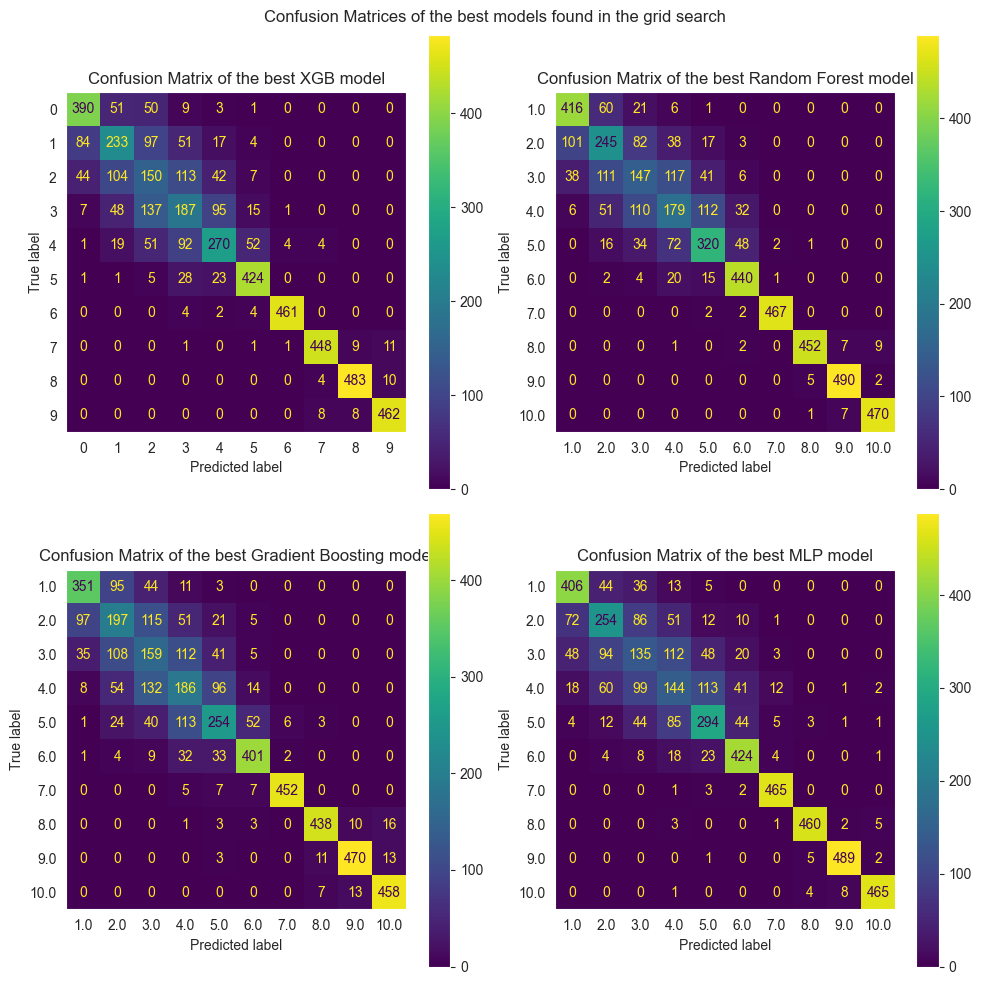

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10), tight_layout = True)
fig.suptitle("Confusion Matrices of the best models found in the grid search")
for model, ax in zip(grid_results3.keys(), axes.flatten()):
    
    if model == "XGB":
        ConfusionMatrixDisplay.from_predictions(y_xgb_test, grid_results3[model]['predictions'], ax = ax)
    else: 
        ConfusionMatrixDisplay.from_predictions(y_test_res, grid_results3[model]['predictions'], ax = ax)
        
    ax.grid(False)
    ax.title.set_text("Confusion Matrix of the best " + model + " model")

As we can see, the optimized version of Random Forest allows for better predictions. While mostly all models more accurately predict level 1 and levels 7 through 10 (bigger micro F1-score thanks to SMOTE influence), the classifier still struggles to properly identify labels that lie in the middle range.

As said above in the EDA, two visible clusters or populations can be appreciated depending on the severity of the anxiety, the larger one covering most of the lower levels.

Comparing statistical information between classes, it might be interesting to check whether it would be wise to unify a couple of classes that share similar statistics as to not reduce the issue to a two class problem like in Section 5.2, gain accuracy and still preserve some class granularity (classes with statistical differences across the data spectrum). 